# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`
#### YU Lingfeng Draft 2

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [177]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [178]:
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

> For the supervised regression models

In [179]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging (Bootstrapped Aggregation)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

> For data analysis and model evaluation

In [180]:
# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

> For time series models

In [181]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec

> For data preparation and visualization

In [182]:
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

> For PCA portfolios

In [183]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

> Let's set some print option.

In [184]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 1 is presented in the cell below: </font>

In [185]:
stock_ticker = ["AMZN", "MSFT", "AAPL", "F"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  4 of 4 completed


Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

In [186]:
# cross-validation is NOT testing set
validation_size = 0.25 # this refers to testing set

In [187]:
stock_data

Adj Close                                          Close  \
                  AAPL        AMZN          F        MSFT        AAPL   
Date                                                                    
1972-06-01         NaN         NaN   0.245674         NaN         NaN   
1972-06-02         NaN         NaN   0.245212         NaN         NaN   
1972-06-05         NaN         NaN   0.245212         NaN         NaN   
1972-06-06         NaN         NaN   0.242436         NaN         NaN   
1972-06-07         NaN         NaN   0.241048         NaN         NaN   
...                ...         ...        ...         ...         ...   
2023-10-13  178.850006  129.789993  11.810000  327.730011  178.850006   
2023-10-16  178.720001  132.550003  11.930000  332.640015  178.720001   
2023-10-17  177.149994  131.470001  12.040000  332.059998  177.149994   
2023-10-18  175.839996  128.130005  11.750000  330.109985  175.839996   
2023-10-19  175.460007  128.399994  11.530000  331.320007  175.460007   

                                                     High              ...  \
                  AMZN          F        MSFT        AAPL        AMZN  ...   
Date                                                                   ...   
1972-06-01         NaN   2.153220         NaN         NaN         NaN  ...   
1972-06-02         NaN   2.149165         NaN         NaN         NaN  ...   
1972-06-05         NaN   2.149165         NaN         NaN         NaN  ...   
1972-06-06         NaN   2.124835         NaN         NaN         NaN  ...   
1972-06-07         NaN   2.112670         NaN         NaN         NaN  ...   
...                ...        ...         ...         ...         ...  ...   
2023-10-13  129.789993  11.810000  327.730011  181.929993  133.309998  ...   
2023-10-16  132.550003  11.930000  332.640015  179.080002  133.070007  ...   
2023-10-17  131.470001  12.040000  332.059998  178.419998  132.580002  ...   
2023-10-18  128.130005  11.750000  330.109985  177.580002  130.669998  ...   
2023-10-19  128.399994  11.530000  331.320007  177.839996  132.240005  ...   

                  Low                    Open                         \
                    F        MSFT        AAPL        AMZN          F   
Date                                                                   
1972-06-01   2.149165         NaN         NaN         NaN   0.000000   
1972-06-02   2.141055         NaN         NaN         NaN   2.153220   
1972-06-05   2.141055         NaN         NaN         NaN   2.149165   
1972-06-06   2.116725         NaN         NaN         NaN   2.149165   
1972-06-07   2.112670         NaN         NaN         NaN   2.124835   
...               ...         ...         ...         ...        ...   
2023-10-13  11.800000  326.359985  181.419998  132.979996  11.970000   
2023-10-16  11.820000  330.600006  176.750000  130.690002  11.910000   
2023-10-17  11.850000  327.410004  176.649994  130.389999  11.850000   
2023-10-18  11.750000  328.299988  175.580002  129.899994  11.930000   
2023-10-19  11.510000  330.910004  176.039993  130.570007  11.590000   

                            Volume                                    
                  MSFT        AAPL        AMZN         F        MSFT  
Date                                                                  
1972-06-01         NaN         NaN         NaN   1091238         NaN  
1972-06-02         NaN         NaN         NaN   1174468         NaN  
1972-06-05         NaN         NaN         NaN   5209582         NaN  
1972-06-06         NaN         NaN         NaN   1424158         NaN  
1972-06-07         NaN         NaN         NaN    675088         NaN  
...                ...         ...         ...       ...         ...  
2023-10-13  332.380005  51427100.0  45786600.0  47221800  21072400.0  
2023-10-16  331.049988  52517000.0  42832900.0  29183000  22158000.0  
2023-10-17  329.589996  57549400.0  49344600.0  40516500  18338500.0  
2023-10-18  332.489990  54764400.0  

In [188]:
index_data

SP500      DJIA  VIXCLS
DATE                                 
2018-10-22  2755.88  25317.41   19.64
2018-10-23  2740.69  25191.43   20.71
2018-10-24  2656.10  24583.42   25.23
2018-10-25  2705.57  24984.55   24.22
2018-10-26  2658.69  24688.31   24.16
...             ...       ...     ...
2023-10-13  4327.78  33670.29   19.32
2023-10-16  4373.63  33984.54   17.21
2023-10-17  4373.20  33997.65   17.88
2023-10-18  4314.60  33665.08   19.22
2023-10-19  4278.00  33414.17     NaN

[1304 rows x 3 columns]

In [189]:
currency_data

DEXJPUS  DEXUSUK
DATE                        
2018-10-22   112.78   1.2974
2018-10-23   112.12   1.2982
2018-10-24   112.58   1.2898
2018-10-25   112.54   1.2827
2018-10-26   111.65   1.2826
...             ...      ...
2023-10-09      NaN      NaN
2023-10-10   148.62   1.2288
2023-10-11   149.17   1.2304
2023-10-12   149.71   1.2214
2023-10-13   149.62   1.2139

[1300 rows x 2 columns]

### Outcome (Y)

In [190]:
return_period = 5

In [191]:
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "AMZN")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y

Date
1972-06-01   NaN
1972-06-02   NaN
1972-06-05   NaN
1972-06-06   NaN
1972-06-07   NaN
              ..
2023-10-13   NaN
2023-10-16   NaN
2023-10-17   NaN
2023-10-18   NaN
2023-10-19   NaN
Name: (Adj Close, AMZN), Length: 12958, dtype: float64

In [192]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

Y

Date
1972-06-01   NaN
1972-06-02   NaN
1972-06-05   NaN
1972-06-06   NaN
1972-06-07   NaN
              ..
2023-10-13   NaN
2023-10-16   NaN
2023-10-17   NaN
2023-10-18   NaN
2023-10-19   NaN
Name: AMZN_pred, Length: 12958, dtype: float64

Step 2. For feature engineering...

> `Correlated assets`

In [193]:
X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("MSFT", "AAPL", "F")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

MSFT      AAPL         F
Date                                    
1972-06-01       NaN       NaN       NaN
1972-06-02       NaN       NaN       NaN
1972-06-05       NaN       NaN       NaN
1972-06-06       NaN       NaN       NaN
1972-06-07       NaN       NaN       NaN
...              ...       ...       ...
2023-10-13  0.001435  0.007633 -0.015960
2023-10-16  0.008514 -0.001510 -0.011667
2023-10-17  0.011114 -0.006975 -0.013201
2023-10-18 -0.006973 -0.022271 -0.041673
2023-10-19  0.000483 -0.029482 -0.039954

[12958 rows x 3 columns]

In [194]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

DEXJPUS   DEXUSUK
DATE                          
2018-10-22       NaN       NaN
2018-10-23       NaN       NaN
2018-10-24       NaN       NaN
2018-10-25       NaN       NaN
2018-10-26       NaN       NaN
...              ...       ...
2023-10-09       NaN       NaN
2023-10-10 -0.003627  0.017983
2023-10-11  0.002282  0.012019
2023-10-12  0.008182  0.003527
2023-10-13  0.003616 -0.009511

[1300 rows x 2 columns]

In [195]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

SP500      DJIA    VIXCLS
DATE                                    
2018-10-22       NaN       NaN       NaN
2018-10-23       NaN       NaN       NaN
2018-10-24       NaN       NaN       NaN
2018-10-25       NaN       NaN       NaN
2018-10-26       NaN       NaN       NaN
...              ...       ...       ...
2023-10-13  0.004465  0.007833  0.101801
2023-10-16  0.008719  0.011241 -0.028074
2023-10-17  0.003427  0.007628  0.048706
2023-10-18 -0.014348 -0.004144  0.177753
2023-10-19 -0.016601 -0.006472       NaN

[1304 rows x 3 columns]

In [196]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["AMZN_DT", "AMZN_3DT", "AMZN_6DT", "AMZN_12DT"]
X4

AMZN_DT  AMZN_3DT  AMZN_6DT  AMZN_12DT
Date                                               
1997-08-11  0.006732  0.064682  0.446567   0.172964
1997-08-12 -0.004730  0.028848  0.354652   0.239876
1997-08-13 -0.023419 -0.041765  0.371687   0.251989
1997-08-14 -0.009609 -0.047175  0.305560   0.276476
1997-08-15 -0.080420 -0.052769  0.100989   0.393226
...              ...       ...       ...        ...
2023-10-13  0.014200  0.005176 -0.061408  -0.001309
2023-10-16  0.032901  0.009704 -0.041163   0.019426
2023-10-17  0.015252  0.042656 -0.043171   0.020518
2023-10-18 -0.028468  0.016922 -0.054892  -0.007774
2023-10-19 -0.030148  0.019027 -0.071016   0.001949

[6592 rows x 4 columns]

> `Technical indicators`

In [197]:
T1 =\
    (
    pd
    .concat([stock_data.loc[ : , ("Adj Close", "AMZN")]
             .rolling(window=i)
             .mean() for i in [21, 
                                63, 
                                252]
            ],
           axis = 1
           )

)

T1.columns = ["AMZN_MA21", "AMZN_MA63", "AMZN_MA252"]
T1

AMZN_MA21   AMZN_MA63  AMZN_MA252
Date                                          
1972-06-01         NaN         NaN         NaN
1972-06-02         NaN         NaN         NaN
1972-06-05         NaN         NaN         NaN
1972-06-06         NaN         NaN         NaN
1972-06-07         NaN         NaN         NaN
...                ...         ...         ...
2023-10-13  130.231429  133.658890  111.470119
2023-10-16  129.858095  133.654445  111.549564
2023-10-17  129.452858  133.592699  111.647064
2023-10-18  129.000477  133.563652  111.703969
2023-10-19  128.672381  133.538255  111.751746

[12958 rows x 3 columns]

In [198]:
T2 =\
    (
    pd
    .concat([stock_data.loc[ : , ("Adj Close", "AMZN")]
             .ewm(span=i, adjust=False)
             .mean() for i in [10, 
                                30, 
                                200]
            ],
           axis = 1
           )

)

T2.columns = ["AMZN_EMA10", "AMZN_EMA30", "AMZN_EMA200"]
T2

AMZN_EMA10  AMZN_EMA30  AMZN_EMA200
Date                                           
1972-06-01         NaN         NaN          NaN
1972-06-02         NaN         NaN          NaN
1972-06-05         NaN         NaN          NaN
1972-06-06         NaN         NaN          NaN
1972-06-07         NaN         NaN          NaN
...                ...         ...          ...
2023-10-13  129.667942  131.386637   122.801683
2023-10-16  130.191953  131.461693   122.898681
2023-10-17  130.424326  131.462229   122.983968
2023-10-18  130.007177  131.247247   123.035172
2023-10-19  129.714962  131.063553   123.088553

[12958 rows x 3 columns]

In [199]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, T1, T2],
            axis = 1)
)

X

MSFT      AAPL         F   DEXJPUS   DEXUSUK     SP500  \
1972-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
1972-06-02       NaN       NaN       NaN       NaN       NaN       NaN   
1972-06-05       NaN       NaN       NaN       NaN       NaN       NaN   
1972-06-06       NaN       NaN       NaN       NaN       NaN       NaN   
1972-06-07       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-10-13  0.001435  0.007633 -0.015960  0.003616 -0.009511  0.004465   
2023-10-16  0.008514 -0.001510 -0.011667       NaN       NaN  0.008719   
2023-10-17  0.011114 -0.006975 -0.013201       NaN       NaN  0.003427   
2023-10-18 -0.006973 -0.022271 -0.041673       NaN       NaN -0.014348   
2023-10-19  0.000483 -0.029482 -0.039954       NaN       NaN -0.016601   

                DJIA    VIXCLS   AMZN_DT  AMZN_3DT  AMZN_6DT  AMZN_12DT  \
1972-06-01       NaN       NaN       NaN       NaN       NaN        NaN   
1972-06-02       NaN       NaN       NaN       NaN       NaN        NaN   
1972-06-05       NaN       NaN       NaN       NaN       NaN        NaN   
1972-06-06       NaN       NaN       NaN       NaN       NaN        NaN   
1972-06-07       NaN       NaN       NaN       NaN       NaN        NaN   
...              ...       ...       ...       ...       ...        ...   
2023-10-13  0.007833  0.101801  0.014200  0.005176 -0.061408  -0.001309   
2023-10-16  0.011241 -0.028074  0.032901  0.009704 -0.041163   0.019426   
2023-10-17  0.007628  0.048706  0.015252  0.042656 -0.043171   0.020518   
2023-10-18 -0.004144  0.177753 -0.028468  0.016922 -0.054892  -0.007774   
2023-10-19 -0.006472       NaN -0.030148  0.019027 -0.071016   0.001949   

             AMZN_MA21   AMZN_MA63  AMZN_MA252  AMZN_EMA10  AMZN_EMA30  \
1972-06-01         NaN         NaN         NaN         NaN         NaN   
1972-06-02         NaN         NaN         NaN         NaN         NaN   
1972-06-05         NaN         NaN         NaN         NaN         NaN   
1972-06-06         NaN         NaN         NaN         NaN         NaN   
1972-06-07         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-10-13  130.231429  133.658890  111.470119  129.667942  131.386637   
2023-10-16  129.858095  133.654445  111.549564  130.191953  131.461693   
2023-10-17  129.452858  133.592699  111.647064  130.424326  131.462229   
2023-10-18  129.000477  133.563652  111.703969  130.007177  131.247247   
2023-10-19  128.672381  133.538255  111.751746  129.714962  131.063553   

            AMZN_EMA200  
1972-06-01          NaN  
1972-06-02          NaN  
1972-06-05          NaN  
1972-06-06          NaN  
1972-06-07          NaN  
...                 ...  
2023-10-13   122.801683  
2023-10-16   122.898681  
2023-10-17   122.983968  
2023-10-18   123.035172  
2023-10-19   123.088553  

[13005 rows x 18 columns]

> Let's concatenate two DataFrames Y and X along the columns, 
> dropping any rows with missing values, 
> and then selecting rows 
> at regular intervals specified by return_period. 

In [200]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)
# MAXIM to keep in mind: Garbage in , Garbage out!

data

AMZN_pred      MSFT      AAPL         F   DEXJPUS   DEXUSUK  \
2018-10-29   0.056175 -0.054163 -0.038860  0.098440 -0.002575 -0.012955   
2018-11-05   0.005544  0.034636 -0.051482  0.026583  0.006468  0.016495   
2018-11-13  -0.086864 -0.007267 -0.054816  0.000000  0.005190 -0.003447   
2018-11-21   0.098402 -0.017878 -0.055133 -0.046121 -0.005645 -0.018227   
2018-11-30  -0.029505  0.073130  0.035858  0.030207  0.006273 -0.002502   
...               ...       ...       ...       ...       ...       ...   
2023-09-08   0.015505  0.019667 -0.052956  0.013918  0.010208 -0.009414   
2023-09-18  -0.064243 -0.026628 -0.007780  0.009772  0.007957 -0.010108   
2023-09-25  -0.013884 -0.035636 -0.010677  0.019262  0.007491 -0.015028   
2023-10-02  -0.009313  0.013326 -0.013321 -0.021696  0.007101 -0.007229   
2023-10-10   0.015252  0.046754  0.034155  0.010713 -0.003627  0.017983   

               SP500      DJIA    VIXCLS   AMZN_DT  AMZN_3DT  AMZN_6DT  \
2018-10-29 -0.042485 -0.035152  0.229235 -0.150770 -0.191895 -0.215016   
2018-11-05  0.036089  0.040835 -0.213073  0.056175 -0.078624 -0.172547   
2018-11-13 -0.012148 -0.013689  0.005510 -0.007111 -0.080947 -0.189401   
2018-11-21 -0.019304 -0.024860 -0.021404 -0.052828 -0.052202 -0.146055   
2018-11-30  0.047336  0.050288 -0.174730  0.117992 -0.037588 -0.046557   
...              ...       ...       ...       ...       ...       ...   
2023-09-08 -0.012990 -0.007524  0.055714  0.001593  0.031228  0.074937   
2023-09-18 -0.007590 -0.001138  0.014389 -0.022044  0.049197  0.002933   
2023-09-25 -0.026413 -0.017993  0.188256 -0.064243 -0.050867 -0.052964   
2023-10-02 -0.011373 -0.017009  0.041153 -0.013884 -0.100172 -0.028630   
2023-10-10  0.029996  0.022084 -0.149695  0.037455 -0.061043 -0.027875   

            AMZN_12DT   AMZN_MA21   AMZN_MA63  AMZN_MA252  AMZN_EMA10  \
2018-10-29  -0.169588   90.140262   94.337277   78.315315   85.643385   
2018-11-05  -0.147388   86.235000   93.481936   78.823581   82.914699   
2018-11-13  -0.140223   84.746309   92.500865   79.492887   83.663490   
2018-11-21  -0.242423   81.393691   90.913301   79.996823   79.073732   
2018-11-30  -0.147253   81.274190   89.268238   80.519976   81.067212   
...               ...         ...         ...         ...         ...   
2023-09-08   0.087413  135.951905  132.211429  110.277143  136.579815   
2023-09-18   0.072812  137.380952  133.776350  110.567143  140.392715   
2023-09-25   0.026008  137.053810  134.176667  110.790992  134.977387   
2023-10-02  -0.002469  135.155239  133.983334  111.022619  130.081189   
2023-10-10  -0.031024  131.986191  133.795239  111.251191  128.423940   

            AMZN_EMA30  AMZN_EMA200  
2018-10-29   90.487602    83.048978  
2018-11-05   87.809032    82.944121  
2018-11-13   86.655088    83.030530  
2018-11-21   83.657025    82.723994  
2018-11-30   82.861843    82.620128  
...                ...          ...  
2023-09-08  134.927490   120.182863  
2023-09-18  137.349265   121.474544  
2023-09-25  135.912725   122.011796  
2023-10-02  133.389550   122.251187  
2023-10-10  131.412339   122.542568  

[235 rows x 19 columns]

In [201]:
Y = data.loc[ : , Y.name]

Y

2018-10-29    0.056175
2018-11-05    0.005544
2018-11-13   -0.086864
2018-11-21    0.098402
2018-11-30   -0.029505
                ...   
2023-09-08    0.015505
2023-09-18   -0.064243
2023-09-25   -0.013884
2023-10-02   -0.009313
2023-10-10    0.015252
Name: AMZN_pred, Length: 235, dtype: float64

In [202]:
X = data.loc[ : , X.columns]

X

MSFT      AAPL         F   DEXJPUS   DEXUSUK     SP500  \
2018-10-29 -0.054163 -0.038860  0.098440 -0.002575 -0.012955 -0.042485   
2018-11-05  0.034636 -0.051482  0.026583  0.006468  0.016495  0.036089   
2018-11-13 -0.007267 -0.054816  0.000000  0.005190 -0.003447 -0.012148   
2018-11-21 -0.017878 -0.055133 -0.046121 -0.005645 -0.018227 -0.019304   
2018-11-30  0.073130  0.035858  0.030207  0.006273 -0.002502  0.047336   
...              ...       ...       ...       ...       ...       ...   
2023-09-08  0.019667 -0.052956  0.013918  0.010208 -0.009414 -0.012990   
2023-09-18 -0.026628 -0.007780  0.009772  0.007957 -0.010108 -0.007590   
2023-09-25 -0.035636 -0.010677  0.019262  0.007491 -0.015028 -0.026413   
2023-10-02  0.013326 -0.013321 -0.021696  0.007101 -0.007229 -0.011373   
2023-10-10  0.046754  0.034155  0.010713 -0.003627  0.017983  0.029996   

                DJIA    VIXCLS   AMZN_DT  AMZN_3DT  AMZN_6DT  AMZN_12DT  \
2018-10-29 -0.035152  0.229235 -0.150770 -0.191895 -0.215016  -0.169588   
2018-11-05  0.040835 -0.213073  0.056175 -0.078624 -0.172547  -0.147388   
2018-11-13 -0.013689  0.005510 -0.007111 -0.080947 -0.189401  -0.140223   
2018-11-21 -0.024860 -0.021404 -0.052828 -0.052202 -0.146055  -0.242423   
2018-11-30  0.050288 -0.174730  0.117992 -0.037588 -0.046557  -0.147253   
...              ...       ...       ...       ...       ...        ...   
2023-09-08 -0.007524  0.055714  0.001593  0.031228  0.074937   0.087413   
2023-09-18 -0.001138  0.014389 -0.022044  0.049197  0.002933   0.072812   
2023-09-25 -0.017993  0.188256 -0.064243 -0.050867 -0.052964   0.026008   
2023-10-02 -0.017009  0.041153 -0.013884 -0.100172 -0.028630  -0.002469   
2023-10-10  0.022084 -0.149695  0.037455 -0.061043 -0.027875  -0.031024   

             AMZN_MA21   AMZN_MA63  AMZN_MA252  AMZN_EMA10  AMZN_EMA30  \
2018-10-29   90.140262   94.337277   78.315315   85.643385   90.487602   
2018-11-05   86.235000   93.481936   78.823581   82.914699   87.809032   
2018-11-13   84.746309   92.500865   79.492887   83.663490   86.655088   
2018-11-21   81.393691   90.913301   79.996823   79.073732   83.657025   
2018-11-30   81.274190   89.268238   80.519976   81.067212   82.861843   
...                ...         ...         ...         ...         ...   
2023-09-08  135.951905  132.211429  110.277143  136.579815  134.927490   
2023-09-18  137.380952  133.776350  110.567143  140.392715  137.349265   
2023-09-25  137.053810  134.176667  110.790992  134.977387  135.912725   
2023-10-02  135.155239  133.983334  111.022619  130.081189  133.389550   
2023-10-10  131.986191  133.795239  111.251191  128.423940  131.412339   

            AMZN_EMA200  
2018-10-29    83.048978  
2018-11-05    82.944121  
2018-11-13    83.030530  
2018-11-21    82.723994  
2018-11-30    82.620128  
...                 ...  
2023-09-08   120.182863  
2023-09-18   121.474544  
2023-09-25   122.011796  
2023-10-02   122.251187  
2023-10-10   122.542568  

[235 rows x 18 columns]

### Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Correlation Matrix'}>

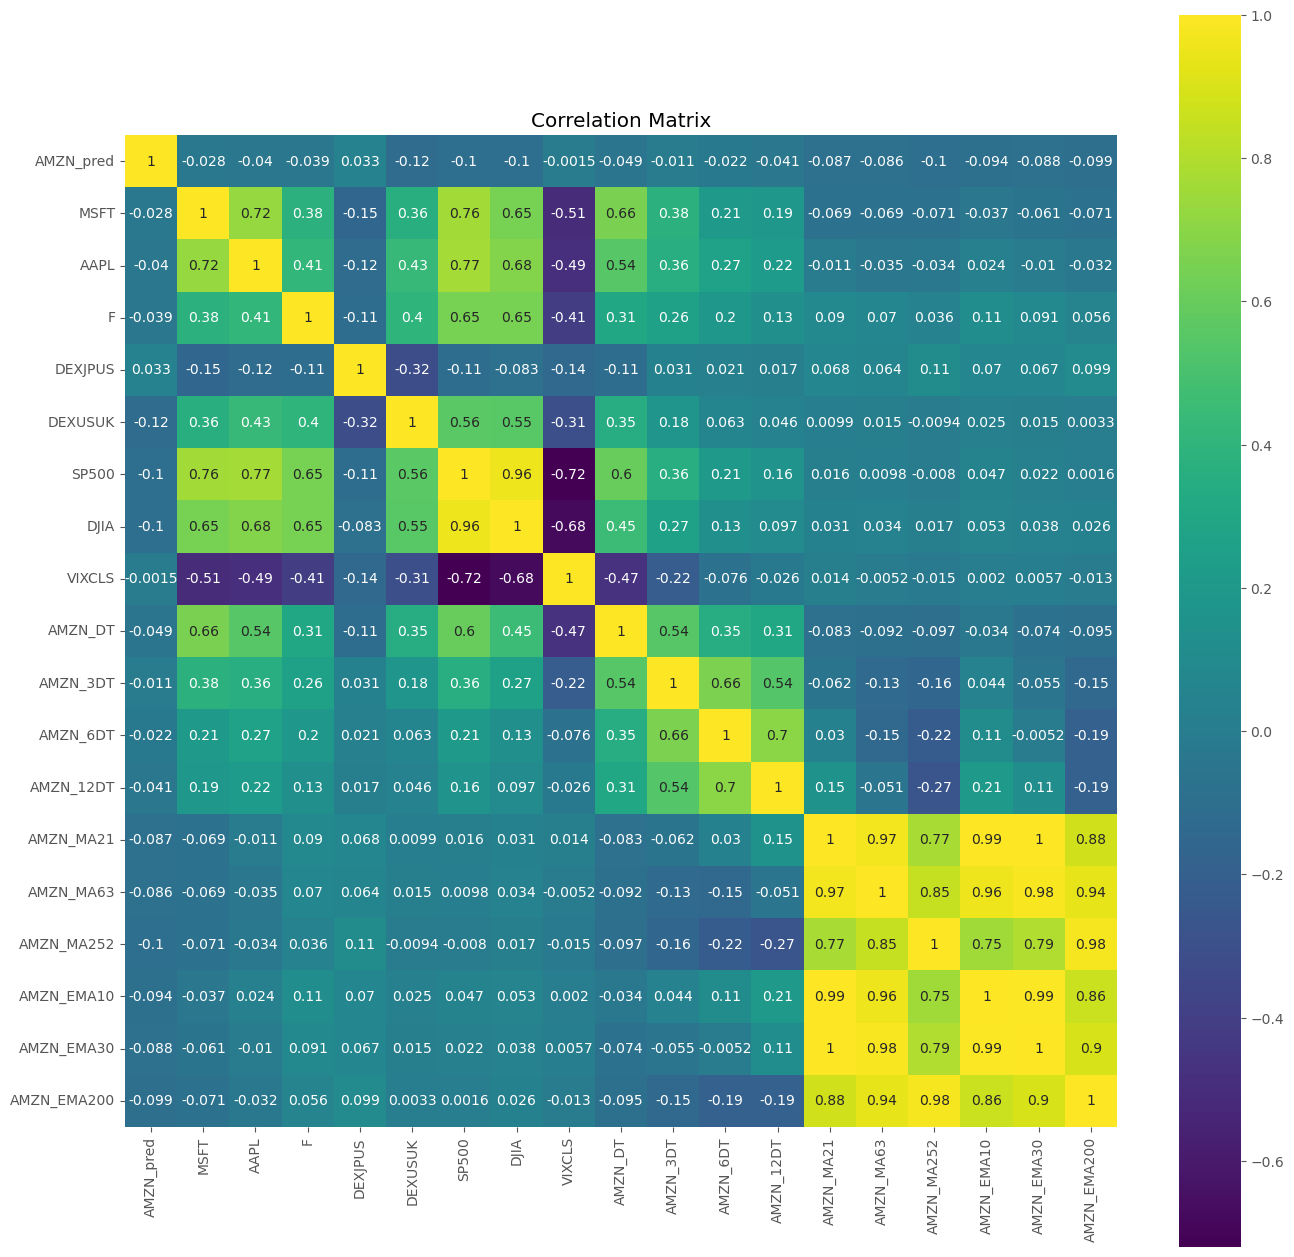

In [203]:
correlation = data.corr()

plt.figure(figsize =[16, 16]
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            cmap = "viridis",
            annot = True)

Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

In [204]:
# recall from step 1 validation_size = 0.25
train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [205]:
num_folds = 10
seed = 231019
scoring = "neg_mean_squared_error"

### Model Comparison with ML Algorithms

In [206]:
models = []

#### Regression and tree regression algorithms

In [207]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

#### Ensemble models

In [208]:
# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )


### outdated tests
### light GBM
### CAT Boost

### Time Series based models (ARIMA)

In [209]:
data

AMZN_pred      MSFT      AAPL         F   DEXJPUS   DEXUSUK  \
2018-10-29   0.056175 -0.054163 -0.038860  0.098440 -0.002575 -0.012955   
2018-11-05   0.005544  0.034636 -0.051482  0.026583  0.006468  0.016495   
2018-11-13  -0.086864 -0.007267 -0.054816  0.000000  0.005190 -0.003447   
2018-11-21   0.098402 -0.017878 -0.055133 -0.046121 -0.005645 -0.018227   
2018-11-30  -0.029505  0.073130  0.035858  0.030207  0.006273 -0.002502   
...               ...       ...       ...       ...       ...       ...   
2023-09-08   0.015505  0.019667 -0.052956  0.013918  0.010208 -0.009414   
2023-09-18  -0.064243 -0.026628 -0.007780  0.009772  0.007957 -0.010108   
2023-09-25  -0.013884 -0.035636 -0.010677  0.019262  0.007491 -0.015028   
2023-10-02  -0.009313  0.013326 -0.013321 -0.021696  0.007101 -0.007229   
2023-10-10   0.015252  0.046754  0.034155  0.010713 -0.003627  0.017983   

               SP500      DJIA    VIXCLS   AMZN_DT  AMZN_3DT  AMZN_6DT  \
2018-10-29 -0.042485 -0.035152  0.229235 -0.150770 -0.191895 -0.215016   
2018-11-05  0.036089  0.040835 -0.213073  0.056175 -0.078624 -0.172547   
2018-11-13 -0.012148 -0.013689  0.005510 -0.007111 -0.080947 -0.189401   
2018-11-21 -0.019304 -0.024860 -0.021404 -0.052828 -0.052202 -0.146055   
2018-11-30  0.047336  0.050288 -0.174730  0.117992 -0.037588 -0.046557   
...              ...       ...       ...       ...       ...       ...   
2023-09-08 -0.012990 -0.007524  0.055714  0.001593  0.031228  0.074937   
2023-09-18 -0.007590 -0.001138  0.014389 -0.022044  0.049197  0.002933   
2023-09-25 -0.026413 -0.017993  0.188256 -0.064243 -0.050867 -0.052964   
2023-10-02 -0.011373 -0.017009  0.041153 -0.013884 -0.100172 -0.028630   
2023-10-10  0.029996  0.022084 -0.149695  0.037455 -0.061043 -0.027875   

            AMZN_12DT   AMZN_MA21   AMZN_MA63  AMZN_MA252  AMZN_EMA10  \
2018-10-29  -0.169588   90.140262   94.337277   78.315315   85.643385   
2018-11-05  -0.147388   86.235000   93.481936   78.823581   82.914699   
2018-11-13  -0.140223   84.746309   92.500865   79.492887   83.663490   
2018-11-21  -0.242423   81.393691   90.913301   79.996823   79.073732   
2018-11-30  -0.147253   81.274190   89.268238   80.519976   81.067212   
...               ...         ...         ...         ...         ...   
2023-09-08   0.087413  135.951905  132.211429  110.277143  136.579815   
2023-09-18   0.072812  137.380952  133.776350  110.567143  140.392715   
2023-09-25   0.026008  137.053810  134.176667  110.790992  134.977387   
2023-10-02  -0.002469  135.155239  133.983334  111.022619  130.081189   
2023-10-10  -0.031024  131.986191  133.795239  111.251191  128.423940   

            AMZN_EMA30  AMZN_EMA200  
2018-10-29   90.487602    83.048978  
2018-11-05   87.809032    82.944121  
2018-11-13   86.655088    83.030530  
2018-11-21   83.657025    82.723994  
2018-11-30   82.861843    82.620128  
...                ...          ...  
2023-09-08  134.927490   120.182863  
2023-09-18  137.349265   121.474544  
2023-09-25  135.912725   122.011796  
2023-10-02  133.389550   122.251187  
2023-10-10  131.412339   122.542568  

[235 rows x 19 columns]

In [210]:
data.columns

Index(['AMZN_pred', 'MSFT', 'AAPL', 'F', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'AMZN_MA21',
       'AMZN_MA63', 'AMZN_MA252', 'AMZN_EMA10', 'AMZN_EMA30', 'AMZN_EMA200'],
      dtype='object')

In [211]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , ["MSFT", "AAPL", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , ["MSFT", "AAPL", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)


* `p` denotes the order of Auto Regression (AR) polynomials

* `d` denotes the number of nonseasonal differences needed for stationarity

* `q` denotes the oder of Moving Average (MA) polynomials


In [212]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()
model_fit

In [213]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

0.003053139042043523

### Model Tuning and Grid Search for ARIMA

In [214]:
# Hyperparameter Tuning; Grid Search for ARIMA

def assess_ARIMA_model(arima_order):
    
    modelARIMA = stats.ARIMA(endog = Y_train, 
                             exog = X_train_ARIMA,
                             order = arima_order)
    
    model_fit = modelARIMA.fit()
    
    error = mean_squared_error(Y_train,
                               model_fit.fittedvalues)
    
    return error

def assess_models(p_values, d_values, q_values):
    
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = assess_ARIMA_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    
                    print("ARIMA%s MSE = %.7f" % (order, mse)
                          )
                    
                except:
                    continue
    print("Best ARIMA%s MSE = %.7f" % (best_cfg, best_score)
          )
    
# parameters to use for assessment

p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

In [215]:
assess_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE = 0.0019785
ARIMA(0, 0, 1) MSE = 0.0019581
ARIMA(0, 1, 0) MSE = 0.0037896
ARIMA(0, 1, 1) MSE = 0.0020808
ARIMA(1, 0, 0) MSE = 0.0019649
ARIMA(1, 0, 1) MSE = 0.0019431
ARIMA(1, 1, 0) MSE = 0.0031432
ARIMA(1, 1, 1) MSE = 0.0020910
ARIMA(2, 0, 0) MSE = 0.0019455
ARIMA(2, 0, 1) MSE = 0.0019451
ARIMA(2, 1, 0) MSE = 0.0027053
ARIMA(2, 1, 1) MSE = 0.0020605
Best ARIMA(1, 0, 1) MSE = 0.0019431


In [216]:
ARIMA_Tuned =\
    stats \
    .ARIMA(endog = Y_train,
           exog = X_train_ARIMA,
         #  order = [] # Team, input optimal set of hyperparameters here
          )

ARIMA_Fit_Tuned = ARIMA_Tuned.fit()

In [217]:
ARIMA_Tuned

In [218]:
ARIMA_Fit_Tuned

In [219]:
Predicted_Tuned =\
    model_fit \
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1:]

print(mean_squared_error(Y_test,
                         Predicted_Tuned)
     )

0.003053139042043523


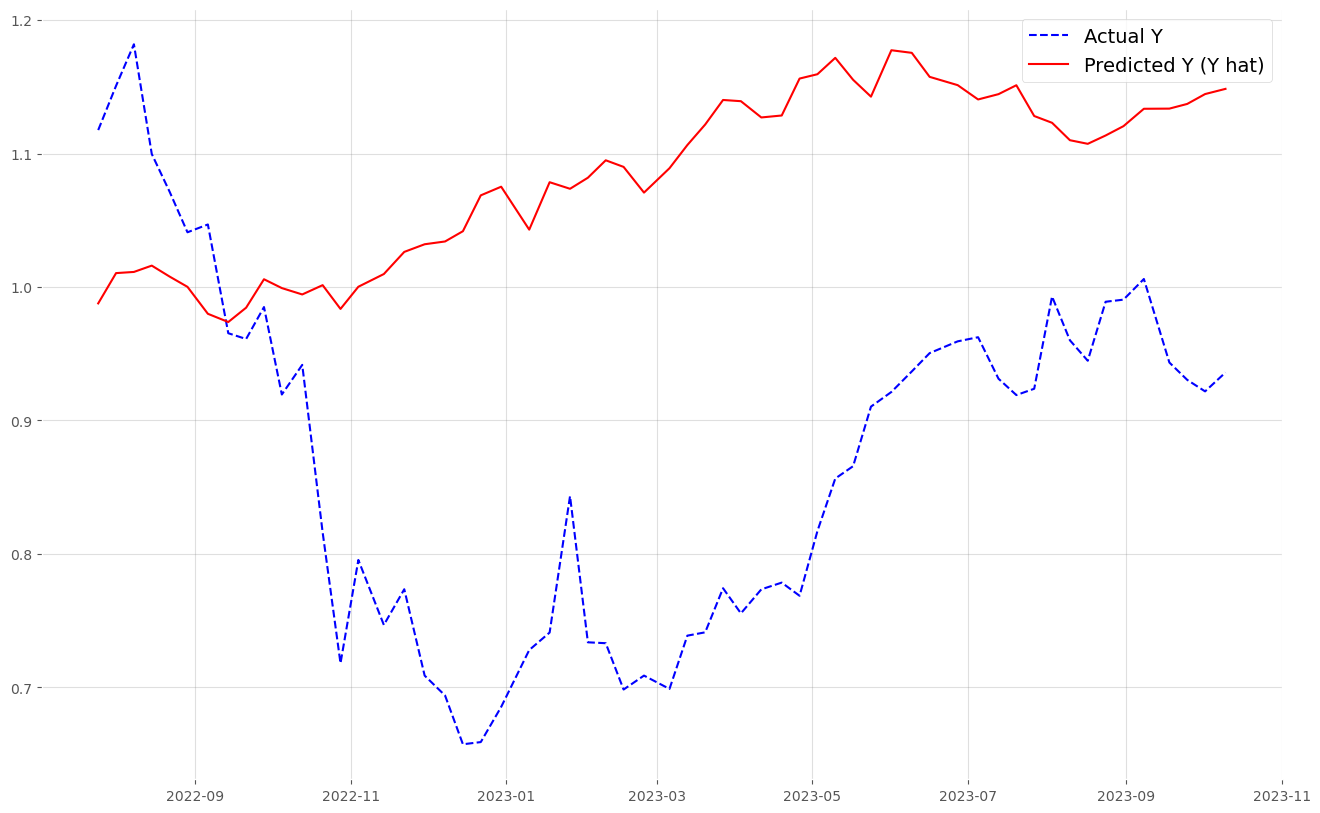

In [220]:
plt.figure(figsize = (16, 10)
           )

Predicted_Tuned.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(Predicted_Tuned).cumprod(), "r", label = "Predicted Y (Y hat)")
plt.legend()
plt.show()

In [221]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       ARIMA_Fit_Tuned.fittedvalues)
)

Predicted_Tuned =\
    model_fit \
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1:]

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        Predicted_Tuned)
)


### Best Practice in ML: Compare Algorithms' Performance

In [222]:
# Gift for you

# Team, let me guide you through this step-by-step

### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

# adding in ARIMA tuned model

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.





    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.002544 (0.001306) 0.001890 0.002836
LASSO: 0.002125 (0.000966) 0.002089 0.002934
EN: 0.002125 (0.000966) 0.002089 0.002934
CART: 0.004406 (0.001786) 0.000000 0.009871
KNN: 0.002338 (0.001071) 0.001710 0.004392
SVR: 0.002297 (0.001093) 0.002229 0.002817
RFR: 0.002426 (0.001079) 0.000324 0.003687
ETR: 0.002454 (0.001089) 0.000000 0.003800
GBR: 0.002635 (0.001058) 0.000146 0.004518
ABR: 0.002533 (0.001139) 0.001061 0.003398


In [223]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

### Comparison of Algorithms: 

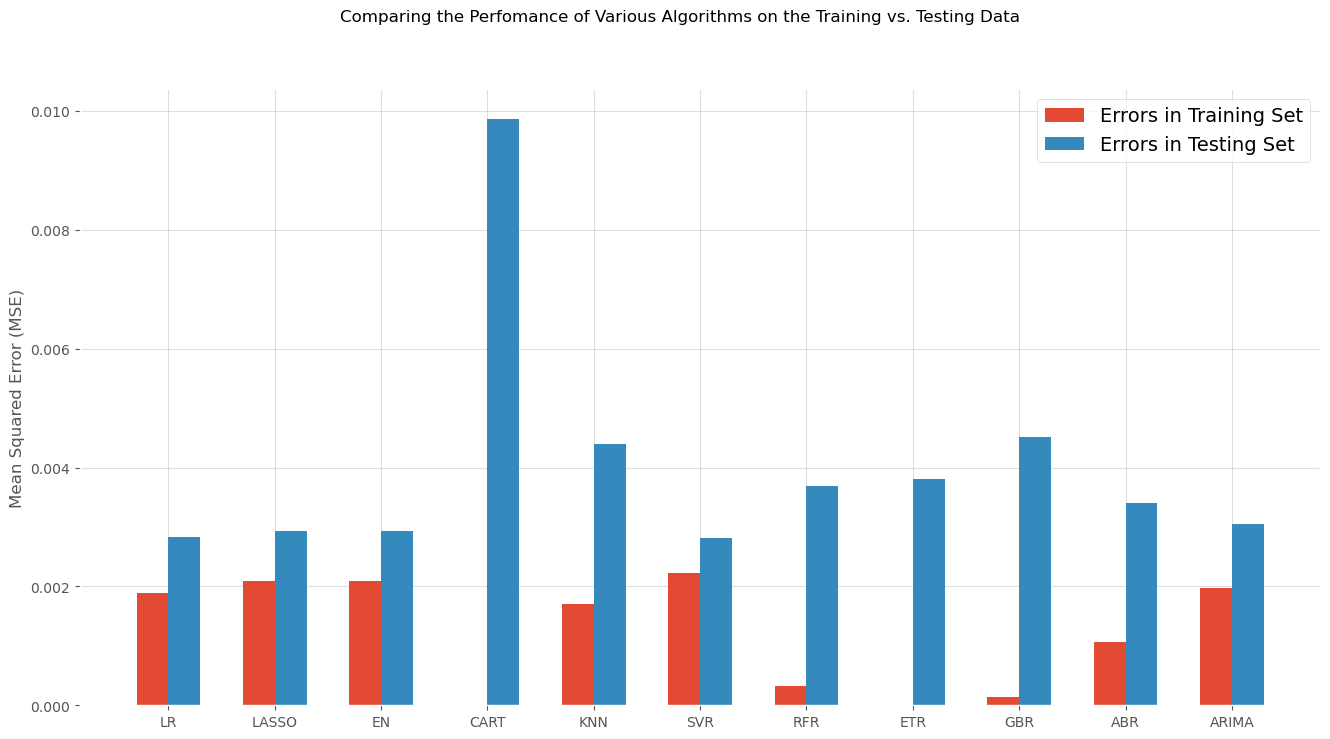

In [224]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [225]:
# Get target data
start = "2015-01-01"
end = "2018-01-01"
apple = stock_data.loc[ start:end , [("Adj Close", "AAPL")]].droplevel(0, axis = 1)
       
apple

AAPL
Date                 
2015-01-02  24.498684
2015-01-05  23.808516
2015-01-06  23.810757
2015-01-07  24.144634
2015-01-08  25.072323
...               ...
2017-12-22  41.427490
2017-12-26  40.376484
2017-12-27  40.383568
2017-12-28  40.497215
2017-12-29  40.059288

[755 rows x 1 columns]

In [226]:
def sig_RSI(stock, period, low_line=30):
    outcome = stock.copy()
    outcome.dropna(inplace = True)    
    outcome.columns = ['Close']

    outcome['Return'] = outcome['Close'].pct_change()
    outcome['Gain'] = np.where(outcome['Return'] < 0, 0, outcome['Return'])
    outcome['AG'] = outcome['Gain'].rolling(window=period).mean()        
    outcome['Loss'] = np.where(outcome['Return'] > 0, 0, outcome['Return'])
    outcome['AL'] = outcome['Loss'].rolling(window=period).mean()  
    outcome['RSI'] = 100 * (1 - 1 / (1+outcome['AG']/(-outcome['AL'])))
    outcome['Lower'] = low_line
    outcome['Higher'] = 100 - low_line
       
    outcome["position"] = np.nan
    flag = 0
    
    for idx in outcome.index:
        rsi = outcome.loc[idx, 'RSI']
        # rsi from 30 - 70
        if abs(rsi - 50) <= 50 - low_line:
            # flag is to rememeber if in a trading position
            if flag == 0:
                continue
            else:
                # we are in a trade right now
                if flag * (rsi - 50) > 0:
                # clear flag, ready for next trade signal
                    flag = 0
        # if rsi identified an strong momentum, trade on reversion.
        else:
            # rsi above 70
            if rsi > 100 - low_line:
                flag = -1
            
            # rsi below 30
            else:
                flag = 1
        outcome.loc[idx, 'position'] = flag  
   
    # as RSI only available after market closes with a 'Close' Price
    # Thus position only opened on next market day
    outcome["position"] = outcome["position"].shift(1)
    outcome["position"].fillna(0, inplace=True)    
    outcome["B_S"] = outcome["position"].diff()
    outcome["B_S"].fillna(0, inplace=True)
    return outcome

In [227]:
apple_RSI = sig_RSI(apple, 14)
apple_RSI

Close    Return      Gain        AG      Loss        AL  \
Date                                                                      
2015-01-02  24.498684       NaN       NaN       NaN       NaN       NaN   
2015-01-05  23.808516 -0.028172  0.000000       NaN -0.028172       NaN   
2015-01-06  23.810757  0.000094  0.000094       NaN  0.000000       NaN   
2015-01-07  24.144634  0.014022  0.014022       NaN  0.000000       NaN   
2015-01-08  25.072323  0.038422  0.038422       NaN  0.000000       NaN   
...               ...       ...       ...       ...       ...       ...   
2017-12-22  41.427490  0.000000  0.000000  0.003783  0.000000 -0.001594   
2017-12-26  40.376484 -0.025370  0.000000  0.003783 -0.025370 -0.003338   
2017-12-27  40.383568  0.000175  0.000175  0.003796  0.000000 -0.003073   
2017-12-28  40.497215  0.002814  0.002814  0.003866  0.000000 -0.003073   
2017-12-29  40.059288 -0.010814  0.000000  0.003845 -0.010814 -0.003845   

                  RSI  Lower  Higher  position  B_S  
Date                                                 
2015-01-02        NaN     30      70       0.0  0.0  
2015-01-05        NaN     30      70       1.0  1.0  
2015-01-06        NaN     30      70       1.0  0.0  
2015-01-07        NaN     30      70       1.0  0.0  
2015-01-08        NaN     30      70       1.0  0.0  
...               ...    ...     ...       ...  ...  
2017-12-22  70.362151     30      70       0.0  0.0  
2017-12-26  53.122744     30      70      -1.0 -1.0  
2017-12-27  55.259827     30      70      -1.0  0.0  
2017-12-28  55.711158     30      70      -1.0  0.0  
2017-12-29  49.993796     30      70      -1.0  0.0  

[755 rows x 11 columns]

In [228]:
apple_RSI['B_S'].value_counts()

B_S
 0.0    702
-1.0     27
 1.0     26
Name: count, dtype: int64

### <font color = red> Answer 2 is presented in the cell below: </font>

In [229]:
def view_RSI_sig(signals, stock_ticker):
    # Create a figure with GridSpec specifying subplot heights
    fig = plt.figure(figsize=(30, 20))  
    # Create a figure with a total height of 14 inches
    gs = GridSpec(2, 1, height_ratios=[30, 8])  # Use GridSpec from the correct module

    # Create a 2x1 grid with specified height ratios

    # Create subplots within the grid
    ax1 = plt.subplot(gs[0])  
    # The first subplot (ax1) with a height ratio of 10
    ax2 = plt.subplot(gs[1], sharex=ax1)  
    # The second subplot (ax2) with a height ratio of 4 and shared x-axis

    # Plot the closing price on the first subplot (ax1)
    ax1.plot(signals.index, signals['Close'], label='Close Price', color='blue')
    ax1.set_ylabel('Close Price')
    ax1.set_title(f'{stock_ticker} Price and trade signals with RSI')
    
    # Plot buy positions with 'g^' format
    buy_positions = signals[signals['B_S'] > 0]
    ax1.scatter(buy_positions.index, buy_positions['Close'],
               label='Buy', color='green', marker='^', s=100)

    # Plot sell positions with 'rv' format
    sell_positions = signals[signals['B_S'] < 0]
    ax1.scatter(sell_positions.index, sell_positions['Close'],
               label='Sell Positions', color='red',
               marker='v', s=100)
    low = signals['Lower'][0]
    high = signals['Higher'][0]
    # Plot the RSI and signal threshold on the second subplot (ax2)
    ax2.plot(signals.index, signals['RSI'], label='RSI Line', color='red')
    ax2.axhline(y=low, label='Lower Threshold', color='green', linestyle='--')
    ax2.axhline(y=high, label='Higher Threshold', color='green', linestyle='--')
    ax2.axhline(y=50, label='Higher Threshold', color='grey', linestyle='--')    
    ax2.set_xlabel('Date')
    ax2.set_ylabel('RSI')

    # Display the plot
    plt.show()
    return

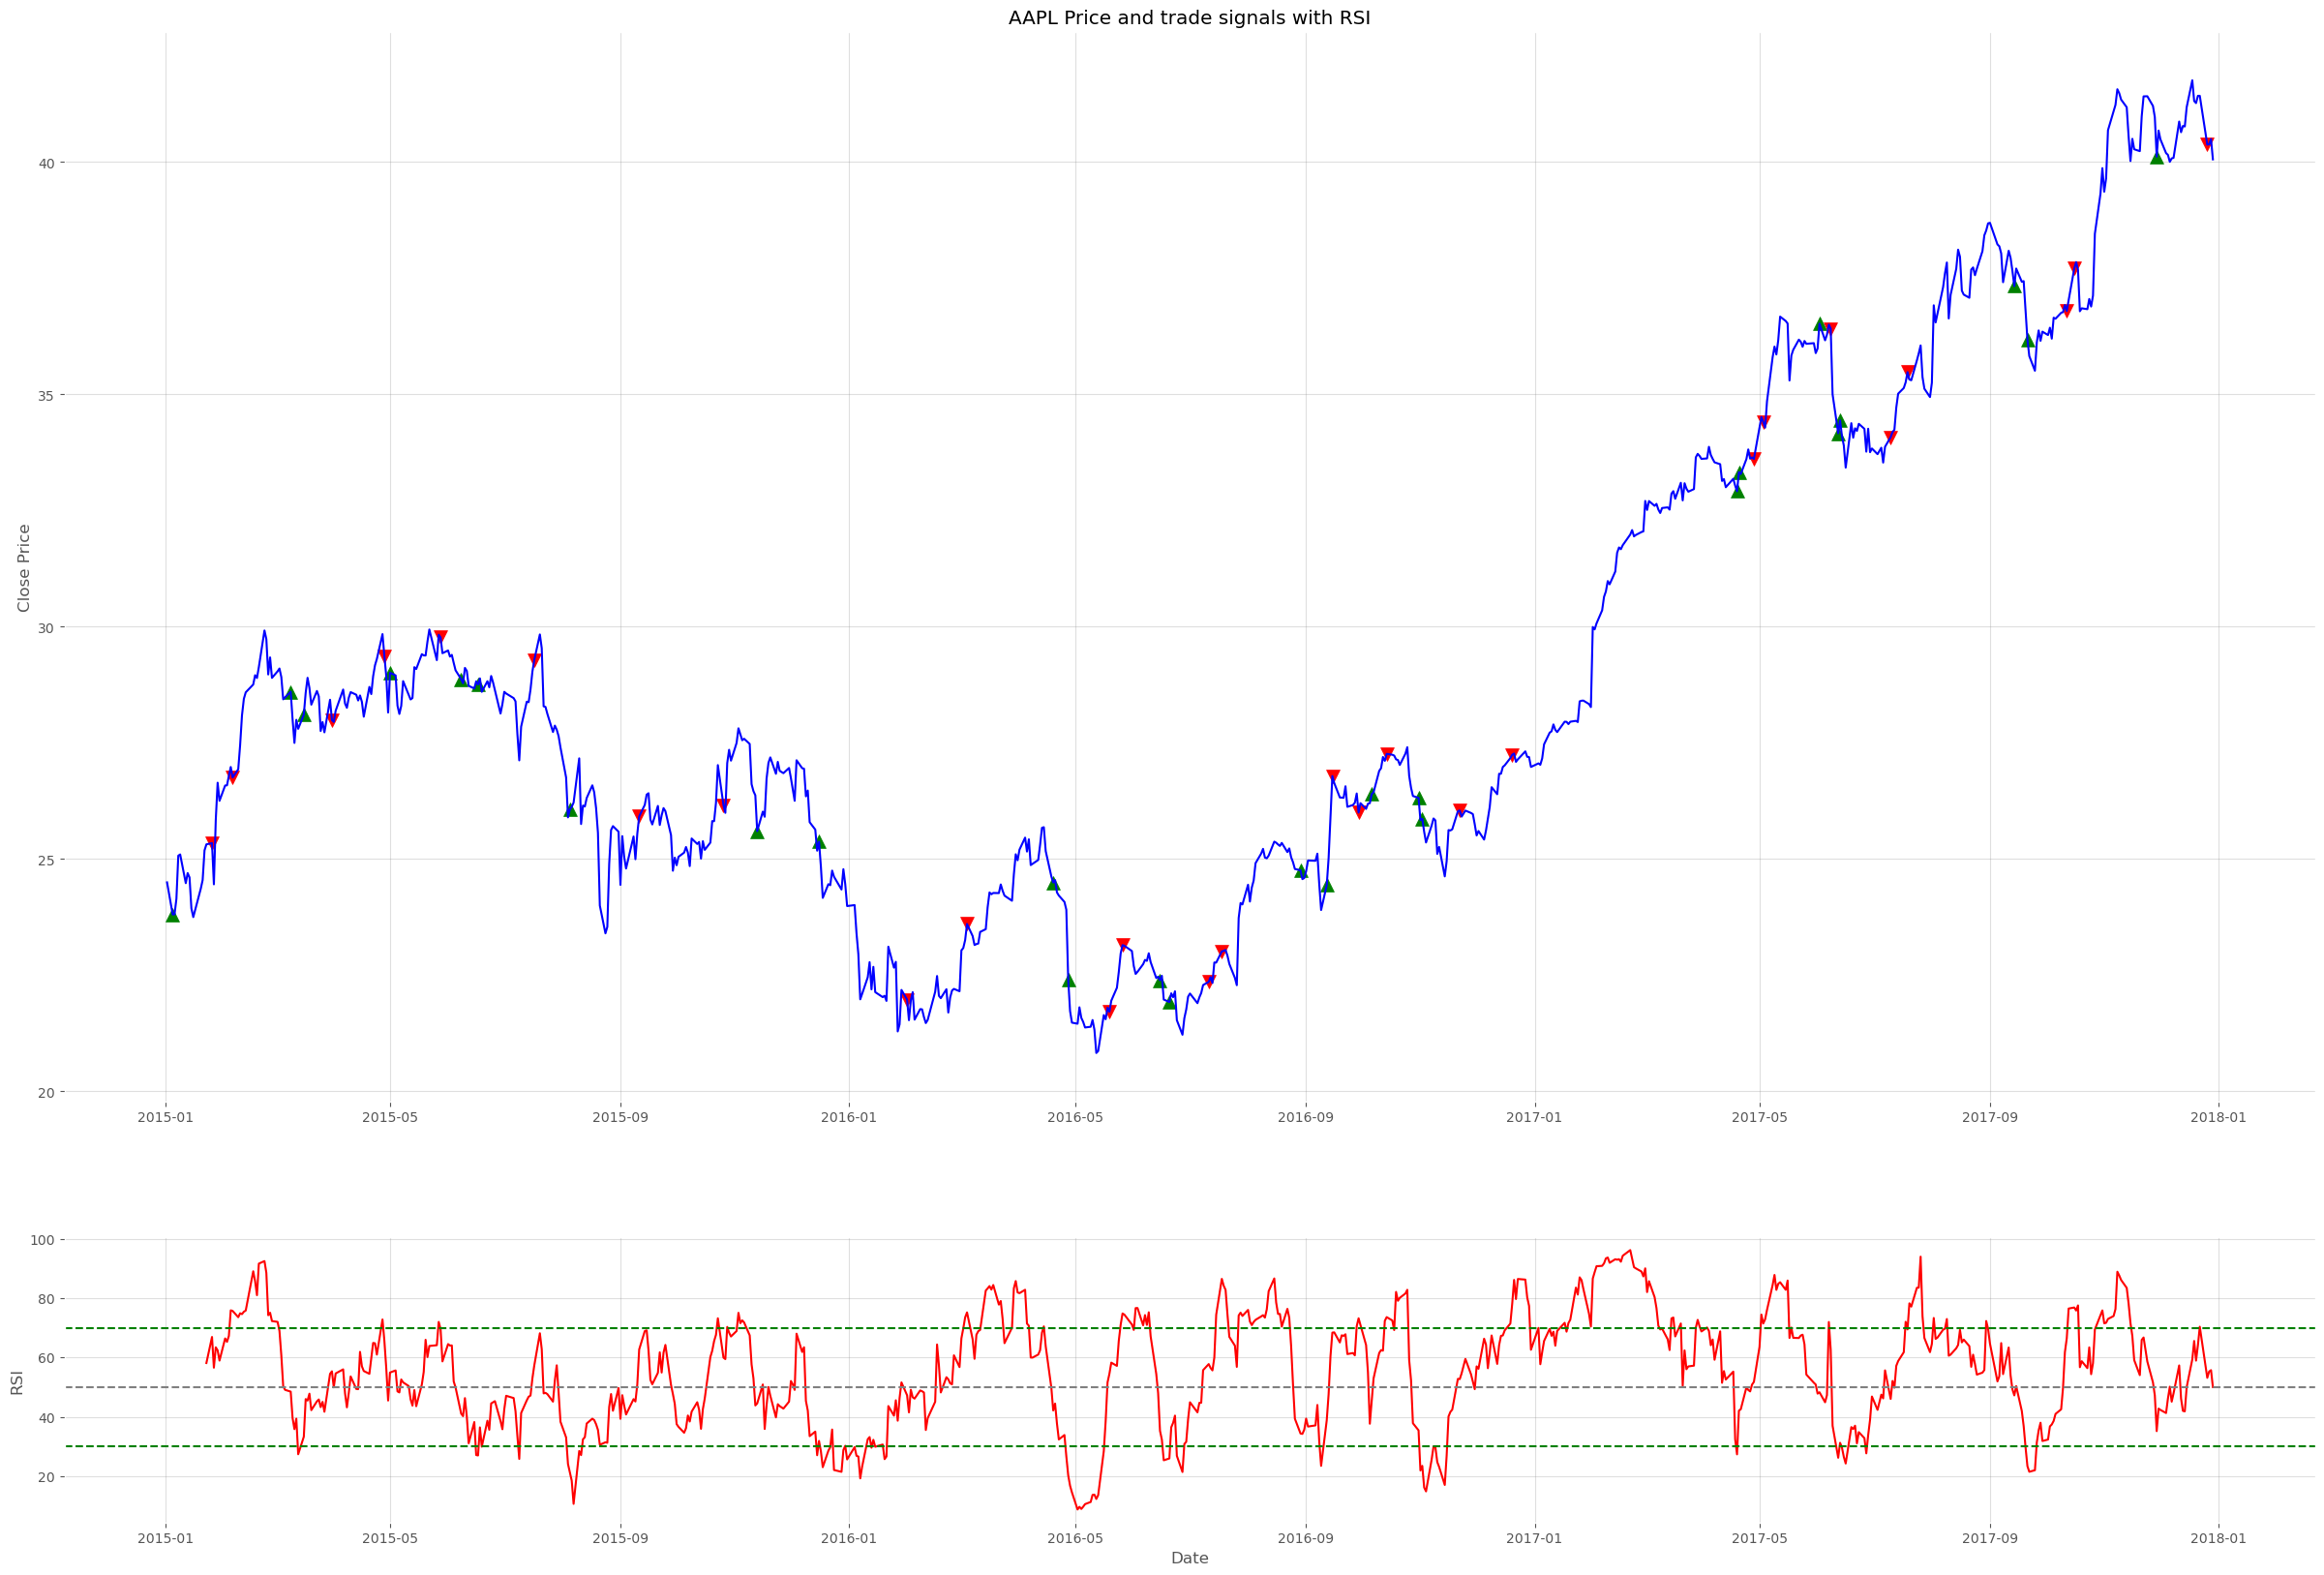

In [230]:
view_RSI_sig(apple_RSI, "AAPL")

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [231]:
def cal_Sharpe(signals, capital, fee=0):
    portfolio =\
    (
    pd
    .DataFrame(index = signals.index)
    .fillna(0.0)
    )
    # record down the percent change ratio in underlying asset, the first row as 0
    portfolio['Asset_Rtn'] = signals["Close"].pct_change()
    portfolio['Asset_Rtn'].fillna(0, inplace=True)
    # record down if the change ratio affecting the portfolio value, the first row as 0
    portfolio['Holding'] = signals['position']                                               
    # use the actual holding direction to adjust on the sign of asset change ratio
    portfolio['Adj_Rtn'] = portfolio['Asset_Rtn']*portfolio['Holding']
    # fill in the actual total value based on trading activities
    portfolio['total'] = np.NaN
    temp_value = capital
    for idx in portfolio.index:
        # the commission fee is always to reduce the portfolio value
        temp_value = (1 + portfolio.loc[idx]['Adj_Rtn']) *\
                            (temp_value - fee * abs(signals.loc[idx]['B_S']))
        portfolio.loc[idx, 'total'] = temp_value 

    portfolio["returns"] =\
    (    portfolio["total"]
        .pct_change()
    )
    portfolio["returns"].fillna(0, inplace=True)
    
    Sharpe =\
    (
    np.sqrt(253) * (portfolio["returns"].mean() /\
                    portfolio["returns"].std()
                    )
    )

    CAGR =\
    (
        (
            (portfolio["total"][-1]) / capital
        )
            **(365.0/((signals.index[-1] -\
                       signals.index[0]).days) 
        ) 
        - 1
    )

    return [portfolio, Sharpe, CAGR]

In [232]:
start_capital = 1e5
commission = 5
apple_RSI_result = cal_Sharpe(apple_RSI, start_capital, commission)
apple_RSI_result[0]

Asset_Rtn  Holding   Adj_Rtn          total   returns
Date                                                             
2015-01-02   0.000000      0.0  0.000000  100000.000000  0.000000
2015-01-05  -0.028172      1.0 -0.028172   97177.975729 -0.028220
2015-01-06   0.000094      1.0  0.000094   97187.123252  0.000094
2015-01-07   0.014022      1.0  0.014022   98549.893883  0.014022
2015-01-08   0.038422      1.0  0.038422  102336.392034  0.038422
...               ...      ...       ...            ...       ...
2017-12-22   0.000000      0.0  0.000000   61132.170146  0.000000
2017-12-26  -0.025370     -1.0  0.025370   62677.953011  0.025286
2017-12-27   0.000175     -1.0 -0.000175   62666.956414 -0.000175
2017-12-28   0.002814     -1.0 -0.002814   62490.599028 -0.002814
2017-12-29  -0.010814     -1.0  0.010814   63166.357490  0.010814

[755 rows x 5 columns]

In [233]:
apple_RSI_result[0]['total'][-1] / start_capital-1

-0.3683364250953758

### <font color = red> Answer 3 </font>

    The answer is ___-36.83___ % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [234]:
def cal_MDD(performs):
    MDD = \
    (
    pd
    .DataFrame(index = performs.index)
    .fillna(0.0)
    )
    
    MDD['Max'] = performs["total"].cummax()
    MDD['Drawdown'] = performs["total"] - MDD['Max']
    MDD['DD%'] = MDD['Drawdown'] / MDD['Max'] * 100
    
    MDD = MDD.dropna()
    
    MDD['DD_Flag'] = 0
    DD = []
    flag = 0
    nDD = 1
    
    for idx in MDD.index:
        if MDD.loc[idx]['Drawdown'] == 0:
            # flag is to rememeber if in DrawDown period
            if flag == 0:
                continue
            else:
                # a DD period is just ended
                # clear flag, ready for next DD seriel number
                flag = 0
                nDD += 1
        # if Drawdown < 0, entering a DD period
        else:
            flag = 1
            MDD.loc[idx, 'DD_Flag'] = nDD
            
    grouped = MDD[MDD['DD_Flag'] != 0].groupby('DD_Flag')
    index_values = performs

    for flags, group in grouped:
        
        s_date = group.index.min()
        e_date = group.index.max()
        # like how we opened position on the next day, close is also shifted
        if len(MDD[e_date:].index) > 1:
            e_date = MDD[e_date:].index[1]
 
        
        days = (e_date.to_pydatetime() - s_date.to_pydatetime()).days
        loss = group['Drawdown'].min()
        loss_pct = group['DD%'].min()

        DD += [[flags, s_date, e_date, days, loss, loss_pct]]
    DD = pd.DataFrame(DD)
    column_names = ['S/N', 'DD_start', 'DD_end', 'Days', 'DD_Max', 'DD%']
    
    DD.columns = column_names
    return [MDD, DD]

In [235]:
apple_RSI_DD = cal_MDD(apple_RSI_result[0])
apple_RSI_DD[1].sort_values(by = 'DD%')

S/N   DD_start     DD_end  Days        DD_Max        DD%
11   12 2015-08-11 2017-12-29   871 -54093.121978 -47.278315
3     4 2015-02-09 2015-04-30    80 -11211.671245 -10.760446
9    10 2015-06-25 2015-07-16    21  -6824.122326  -6.275854
1     2 2015-01-12 2015-01-22    10  -5506.014369  -5.374543
0     1 2015-01-05 2015-01-08     3  -2822.024271  -2.822024
8     9 2015-06-19 2015-06-24     5  -1086.458453  -1.000966
7     8 2015-06-08 2015-06-18    10   -264.648330  -0.244336
5     6 2015-06-01 2015-06-02     1   -213.454138  -0.199550
6     7 2015-06-03 2015-06-04     1   -132.005767  -0.123107
2     3 2015-01-26 2015-02-06    11     -5.000000  -0.004839
4     5 2015-05-01 2015-05-28    27     -5.000000  -0.004736
10   11 2015-07-17 2015-08-05    19     -5.000000  -0.004584

In [236]:
def view_MDD(porfolio, ticker_str):
    fig = plt.figure(figsize = [16, 8])

    porfolio[0]['total'].plot(color = "blue",
                        lw = 0.80,
                        label = "Max")
    porfolio[0]['total'].cummax().plot(color = "blue",
                        linestyle='--',                
                        lw = 0.80)                               

    # Add a legend
    plt.legend()
    # Set the y-label and plot title
    plt.ylabel('portfolio value')
    plt.title(ticker_str)

    plt.show()  

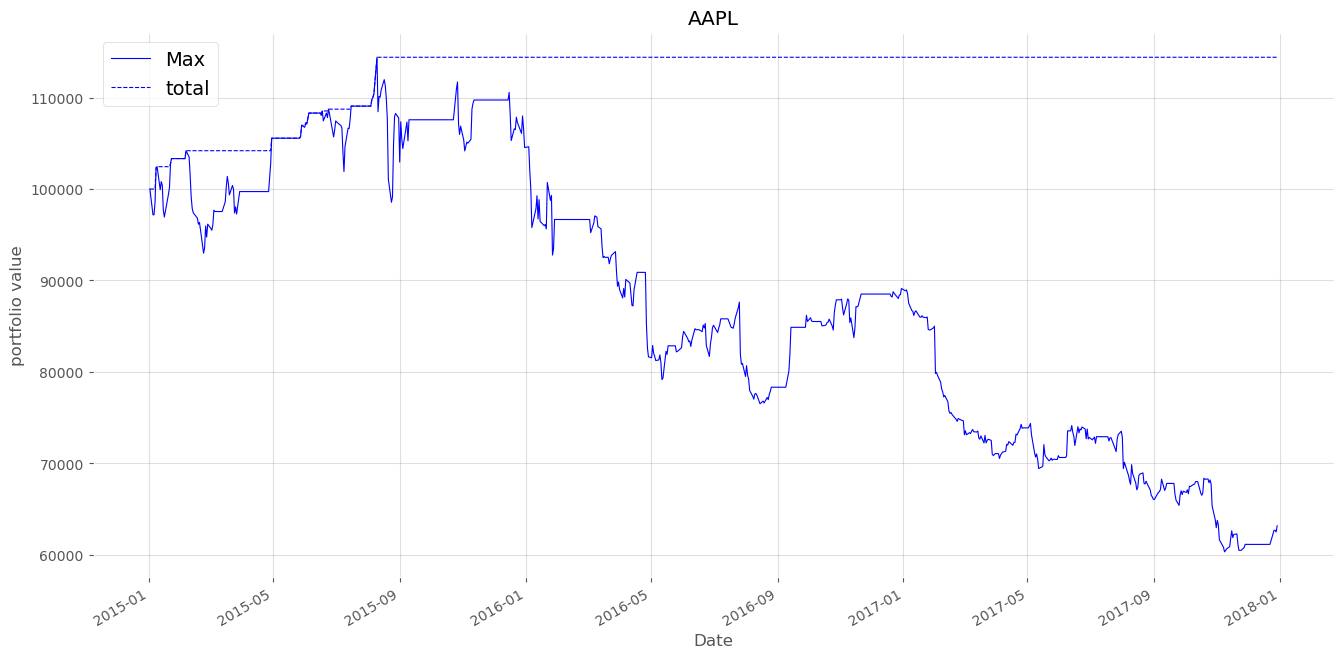

In [237]:
view_MDD(apple_RSI_result, 'AAPL')

### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown __-47.27_ % | Duration _____871____ Days
    
    The 2nd worst drawdown period : Net drawdown ____-10.76___ % | Duration ___80_____ Days
     
    The 3rd worst drawdown period : Net drawdown ____-6.28____ % | Duration ___21______ Days
         
    The 4th worst drawdown period : Net drawdown _____-5.37____ % | Duration ___10_______ Days
    
    The 5th worst drawdown period : Net drawdown ____-2.82___ % | Duration _____3_____ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [238]:
def annual_perform_matrix(list_of_portfolios, list_of_ticker, list_year_seperation):
    # Define the to be returned DataFrame data as NaN
    data = np.NaN
    # Define your row names and column names
    row_names = []
    for i in range (len(list_year_seperation)-1):
        row_names += ['Year '+ list_year_seperation[i][:4]]
    col_names = list_of_ticker
    # Create the DataFrame
    df = pd.DataFrame(data, index=row_names, columns=col_names)
    
    for i in range(len(df)):
        for j in range(len(list_of_portfolios)):
            year = list_of_portfolios[j][0]\
                    .loc[list_year_seperation[i]:list_year_seperation[i+1]]
            df.iloc[i][list_of_ticker[j]] = \
                (year['total'][-1] / year['total'][0]-1)*100

    return df

In [239]:
year_seperation = ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01']
annual_perform_matrix([apple_RSI_result], ['AAPL'], year_seperation)

AAPL
Year 2015   4.537875
Year 2016 -14.822158
Year 2017 -28.919012

### <font color = red> Answer 5 </font>

    Below average year(s) : ___2016, 2107_______ 
    
    Above average year(s) : ____2015_____ 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [240]:
apple_RSI_result[1]

-0.700353274271077

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: __-0.7003____
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 is presented in the cell below: </font>

Step 1: IMPORT DATA

In [241]:
tickers = ["AAPL","MSFT","AMZN","BRK-B","UNH","JNJ","XOM","JPM","PG","NVDA",
           "CVX","HD","LLY","PFE","PEP","MRK","BAC","KO","COST","TMO","WMT",
           "MCD","ABT","DIS","DHR","CSCO","WFC","COP","VZ","BMY"]
# googled the first 30 stocks based on market cap and exist before January 2000

In [242]:
SPX_data = yf.download(tickers, start="2000-01-01", end="2020-01-01")

[*********************100%%**********************]  30 of 30 completed


In [243]:
SPX_data

Adj Close                                                          \
                 AAPL        ABT       AMZN        BAC        BMY       BRK-B   
Date                                                                            
2000-01-03   0.848323   9.081107   4.468750  13.141623  25.849369   35.299999   
2000-01-04   0.776801   8.821646   4.096875  12.361606  23.893734   34.080002   
2000-01-05   0.788168   8.805432   3.487500  12.497260  23.740677   34.639999   
2000-01-06   0.719961   9.113541   3.278125  13.565551  24.067957   36.080002   
2000-01-07   0.754065   9.210835   3.478125  13.209451  27.592545   36.400002   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  69.327454  81.588730  89.460503  32.148037  55.617802  225.470001   
2019-12-26  70.702942  81.588730  93.438499  32.421879  56.322266  226.449997   
2019-12-27  70.676102  81.700897  93.489998  32.266697  56.480782  226.139999   
2019-12-30  71.095573  81.140038  92.344498  32.084141  56.119732  225.759995   
2019-12-31  71.615044  81.196129  92.391998  32.148037  56.524807  226.500000   

                                                          ...    Volume  \
                  COP        COST       CSCO         CVX  ...      NVDA   
Date                                                      ...             
2000-01-03   8.086301   30.799137  37.228069   17.508463  ...  30091200   
2000-01-04   7.930149   29.112099  35.139500   17.508463  ...  30048000   
2000-01-05   7.785154   29.609573  35.031837   17.822512  ...  18835200   
2000-01-06   8.052835   30.204332  34.450497   18.581478  ...  12048000   
2000-01-07   8.052835   32.204994  36.474464   18.908627  ...   7118400   
...               ...         ...        ...         ...  ...       ...   
2019-12-24  55.508957  278.681122  42.216801  101.557022  ...  13886400   
2019-12-26  55.792206  280.101807  42.278648  101.776443  ...  18285200   
2019-12-27  55.775047  278.567413  42.207970  101.523270  ...  25464400   
2019-12-30  55.457447  279.543030  42.048916  101.143509  ...  25805600   
2019-12-31  55.817955  278.387512  42.375839  101.700500  ...  23100400   

                                                                              \
                 PEP       PFE       PG     TMO       UNH       VZ       WFC   
Date                                                                           
2000-01-03   5298400  12873345  4275000  432200   3431200  4663843   9037000   
2000-01-04   4555700  14208974  4270800  568400   5997600  5005878  15237200   
2000-01-05   5701900  12981591  5098400  490800  10562400  6368681   8228200   
2000-01-06   6863100  11115273  6524200  561900  15300000  4705763   8326800   
2000-01-07  10527800  17962163  9832000  266600  16160800  5043907   7711200   
...              ...       ...      ...     ...       ...      ...       ...   
2019-12-24   1220600   5187683  2022100  489200    714000  6640100   4635500   
2019-12-26   2934700   9384078  4760400  680700   1050600  8117800  12517100   
2019-12-27   2554000  10117662  5192000  628800   1547100  8166800   9892000   
2019-12-30   3024700  11554264  3884300  606600   1511700  6765400  10900500   
2019-12-31   3229400  15175703  4798900  875800   2224200  8466700  12566000   

                               
                WMT       XOM  
Date                           
2000-01-03  8369900  13458200  
2000-01-04  6745100  14510800  
2000-01-05  7018700  17485000  
2000-01-06  6544500  19461600  
2000-01-07  7976900  16603800  
...             ...       ...  
2019-12-24  2227400   3979400  
2019-12-26  4223800   8840200  
2019-12-27  3544000  10516100  
2019-12-30  2945800  12689400  
2019-12-31  4912000  13151800  

[5031 rows x 180 columns]

In [244]:
spx = SPX_data[[('Adj Close')]].droplevel(0, axis = 1)
spx

AAPL        ABT       AMZN        BAC        BMY       BRK-B  \
Date                                                                            
2000-01-03   0.848323   9.081107   4.468750  13.141623  25.849369   35.299999   
2000-01-04   0.776801   8.821646   4.096875  12.361606  23.893734   34.080002   
2000-01-05   0.788168   8.805432   3.487500  12.497260  23.740677   34.639999   
2000-01-06   0.719961   9.113541   3.278125  13.565551  24.067957   36.080002   
2000-01-07   0.754065   9.210835   3.478125  13.209451  27.592545   36.400002   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  69.327454  81.588730  89.460503  32.148037  55.617802  225.470001   
2019-12-26  70.702942  81.588730  93.438499  32.421879  56.322266  226.449997   
2019-12-27  70.676102  81.700897  93.489998  32.266697  56.480782  226.139999   
2019-12-30  71.095573  81.140038  92.344498  32.084141  56.119732  225.759995   
2019-12-31  71.615044  81.196129  92.391998  32.148037  56.524807  226.500000   

                  COP        COST       CSCO         CVX  ...       NVDA  \
Date                                                      ...              
2000-01-03   8.086301   30.799137  37.228069   17.508463  ...   0.894729   
2000-01-04   7.930149   29.112099  35.139500   17.508463  ...   0.870838   
2000-01-05   7.785154   29.609573  35.031837   17.822512  ...   0.842169   
2000-01-06   8.052835   30.204332  34.450497   18.581478  ...   0.787218   
2000-01-07   8.052835   32.204994  36.474464   18.908627  ...   0.800359   
...               ...         ...        ...         ...  ...        ...   
2019-12-24  55.508957  278.681122  42.216801  101.557022  ...  59.428028   
2019-12-26  55.792206  280.101807  42.278648  101.776443  ...  59.569981   
2019-12-27  55.775047  278.567413  42.207970  101.523270  ...  58.992184   
2019-12-30  55.457447  279.543030  42.048916  101.143509  ...  57.859013   
2019-12-31  55.817955  278.387512  42.375839  101.700500  ...  58.601185   

                   PEP        PFE          PG         TMO         UNH  \
Date                                                                    
2000-01-03   20.528568  13.436362   28.608173   12.305518    5.440379   
2000-01-04   20.006660  12.935794   28.057722   11.844061    5.370793   
2000-01-05   19.519545  13.146557   27.523909   11.946607    5.358142   
2000-01-06   20.389397  13.620785   28.791668   11.946607    5.554249   
2000-01-07   20.946108  14.542882   31.093668   12.100430    6.205826   
...                ...        ...         ...         ...         ...   
2019-12-24  123.290627  32.363068  114.152260  323.709442  278.903564   
2019-12-26  123.110519  32.437199  114.152260  322.916290  279.954681   
2019-12-27  123.876053  32.387779  114.945358  323.749054  280.257660   
2019-12-30  123.218590  32.050060  113.468536  322.252075  278.250275   
2019-12-31  123.092476  32.272465  113.860535  322.083496  278.373383   

                   VZ        WFC         WMT        XOM  
Date                                                     
2000-01-03  17.758356  10.209317   43.717709  18.668190  
2000-01-04  17.184313   9.703737   42.081875  18.310619  
2000-01-05  17.758356   9.605881   41.223053  19.308844  
2000-01-06  17.668152  10.029914   41.672909  20.307066  
2000-01-07  17.537701  10.209317   44.821896  20.247465  
...               ...        ...         ...        ...  
2019-12-24  49.607746  48.790810  112.622276  57.334324  
2019-12-26  49.615852  49.089977  112.631699  57.424389  
2019-12-27  49.810131  48.881474  112.697678  57.227879  
2019-12-30  49.551083  48.591370  112.518616  56.892155  
2019-12-31  49.704899  48.772675  111.990898  57.137806  

[5031 rows x 30 columns]

In [245]:
missing_values =\
(
    spx
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

AAPL    0.0
ABT     0.0
WMT     0.0
WFC     0.0
VZ      0.0
UNH     0.0
TMO     0.0
PG      0.0
PFE     0.0
PEP     0.0
dtype: float64

Step 2: Your objective is to find the portfolio using PCA

In [246]:
Daily_Linear_Return =\
(
    spx
    .pct_change(1)
)

Daily_Linear_Return.head()

AAPL       ABT      AMZN       BAC       BMY     BRK-B  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.084310 -0.028572 -0.083217 -0.059355 -0.075655 -0.034561   
2000-01-05  0.014633 -0.001838 -0.148741  0.010974 -0.006406  0.016432   
2000-01-06 -0.086539  0.034991 -0.060036  0.085482  0.013786  0.041571   
2000-01-07  0.047369  0.010676  0.061010 -0.026250  0.146443  0.008869   

                 COP      COST      CSCO       CVX  ...      NVDA       PEP  \
Date                                                ...                       
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04 -0.019311 -0.054776 -0.056102  0.000000  ... -0.026701 -0.025423   
2000-01-05 -0.018284  0.017088 -0.003064  0.017937  ... -0.032922 -0.024348   
2000-01-06  0.034384  0.020087 -0.016595  0.042585  ... -0.065249  0.044563   
2000-01-07  0.000000  0.066238  0.058750  0.017606  ...  0.016692  0.027304   

                 PFE        PG       TMO       UNH        VZ       WFC  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.037255 -0.019241 -0.037500 -0.012791 -0.032325 -0.049521   
2000-01-05  0.016293 -0.019026  0.008658 -0.002356  0.033405 -0.010084   
2000-01-06  0.036072  0.046060  0.000000  0.036600 -0.005080  0.044143   
2000-01-07  0.067698  0.079954  0.012876  0.117311 -0.007383  0.017887   

                 WMT       XOM  
Date                            
2000-01-03       NaN       NaN  
2000-01-04 -0.037418 -0.019154  
2000-01-05 -0.020408  0.054516  
2000-01-06  0.010913  0.051698  
2000-01-07  0.075564 -0.002935  

[5 rows x 30 columns]

In [247]:
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)
spx.shape[0] - Daily_Linear_Return.shape[0]

1012

In [248]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)
scaler

StandardScaler()

In [249]:
scaled_spx =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_spx.describe()

AAPL           ABT          AMZN           BAC           BMY  \
count  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03   
mean  -6.453050e-17  1.025416e-16  7.779020e-17  3.535918e-17 -3.535918e-18   
std    1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00   
min   -3.800250e+00 -3.819590e+00 -4.585033e+00 -4.783599e+00 -4.125392e+00   
25%   -5.254398e-01 -5.805132e-01 -5.171846e-01 -4.737029e-01 -5.789885e-01   
50%   -2.106207e-02 -1.988446e-02 -1.542174e-02  7.501662e-03 -8.083635e-03   
75%    5.478017e-01  5.900887e-01  5.515704e-01  5.016000e-01  5.591898e-01   
max    3.756137e+00  3.877086e+00  4.575831e+00  4.907147e+00  4.105649e+00   

              BRK-B           COP          COST          CSCO           CVX  \
count  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03   
mean  -3.889510e-17 -2.121551e-17  3.447520e-17  1.591163e-17 -5.127081e-17   
std    1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00   
min   -3.989578e+00 -3.666859e+00 -4.077486e+00 -4.476441e+00 -3.789420e+00   
25%   -5.554812e-01 -5.909698e-01 -5.662247e-01 -5.000675e-01 -5.937881e-01   
50%   -3.920516e-02 -3.967403e-03 -7.596490e-03  6.082405e-03  1.553382e-02   
75%    5.411745e-01  6.267726e-01  5.523645e-01  5.461057e-01  6.060065e-01   
max    4.058609e+00  3.655565e+00  4.160678e+00  4.429264e+00  3.762497e+00   

       ...          NVDA           PEP           PFE            PG  \
count  ...  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03   
mean   ... -4.508296e-17 -8.839795e-19  1.237571e-17 -2.077352e-17   
std    ...  1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00   
min    ... -4.279536e+00 -3.889298e+00 -3.968251e+00 -4.386712e+00   
25%    ... -5.576597e-01 -6.012357e-01 -5.715219e-01 -5.541470e-01   
50%    ... -9.990560e-03 -2.267552e-02 -2.304836e-02 -1.641260e-02   
75%    ...  5.297004e-01  5.883545e-01  5.792752e-01  5.459798e-01   
max    ...  4.162649e+00  4.118173e+00  3.979367e+00  4.190513e+00   

               TMO           UNH            VZ           WFC           WMT  \
count  4019.000000  4.019000e+03  4.019000e+03  4.019000e+03  4.019000e+03   
mean      0.000000 -1.414367e-16 -3.889510e-17  1.237571e-17 -5.303877e-18   
std       1.000124  1.000124e+00  1.000124e+00  1.000124e+00  1.000124e+00   
min      -3.988440 -3.994213e+00 -4.000897e+00 -4.639353e+00 -4.126958e+00   
25%      -0.556185 -5.581821e-01 -5.791156e-01 -4.986834e-01 -5.575546e-01   
50%      -0.024007 -8.246107e-03  2.127389e-02 -9.615373e-04  1.775972e-02   
75%       0.553579  5.621504e-01  5.700797e-01  5.073360e-01  5.742862e-01   
max       3.916412  4.054164e+00  3.834544e+00  4.729711e+00  4.191204e+00   

                XOM  
count  4.019000e+03  
mean   1.591163e-17  
std    1.000124e+00  
min   -3.757509e+00  
25%   -5.933216e-01  
50%   -5.263850e-03  
75%    6.001486e-01  
max    3.790021e+00  

[8 rows x 30 columns]

<Axes: title={'center': 'AAPL Return'}, xlabel='Date', ylabel='Linear Return'>

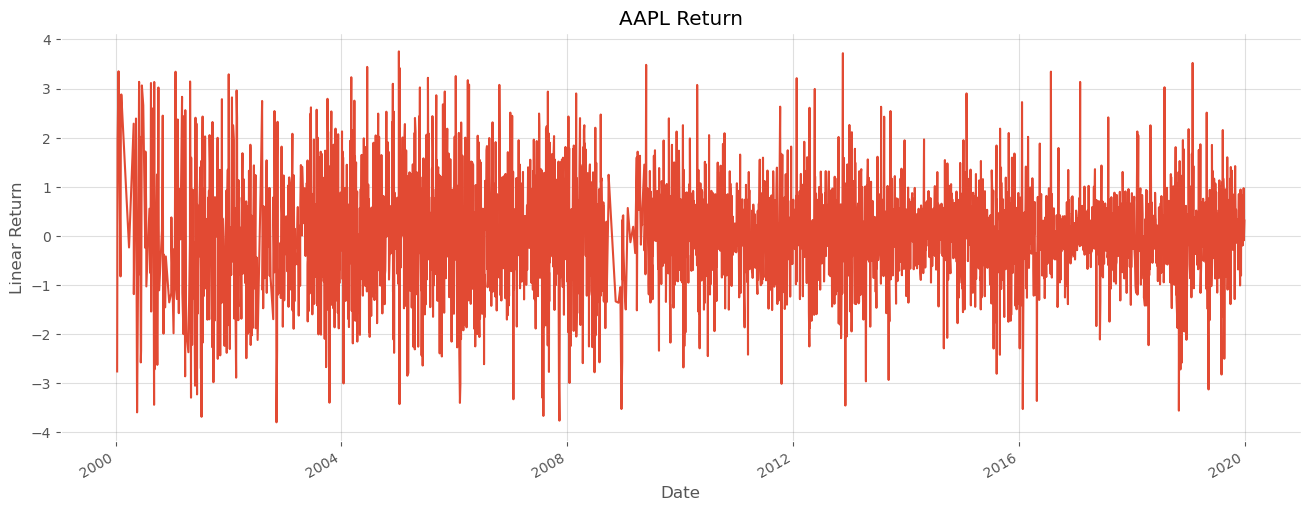

In [250]:
plt.figure(figsize = [16, 6]
          )

plt.title("AAPL Return")

plt.ylabel("Linear Return")

(
    scaled_spx
    ["AAPL"]
    .plot()
)

### MODEL

In [251]:
prop =\
    int(len(scaled_spx) * 0.80)

X_Train = scaled_spx[    : prop] # First 80% of the data
X_Test  = scaled_spx[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [252]:
stock_tickers =\
(
 scaled_spx
 .columns
 .values
)

stock_tickers

array(['AAPL', 'ABT', 'AMZN', 'BAC', 'BMY', 'BRK-B', 'COP', 'COST',
       'CSCO', 'CVX', 'DHR', 'DIS', 'HD', 'JNJ', 'JPM', 'KO', 'LLY',
       'MCD', 'MRK', 'MSFT', 'NVDA', 'PEP', 'PFE', 'PG', 'TMO', 'UNH',
       'VZ', 'WFC', 'WMT', 'XOM'], dtype=object)

### Apply Principal Component Analysis (PCA)

In [253]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)
PrincipalComponent

PCA()

### Explained Variance

In [254]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

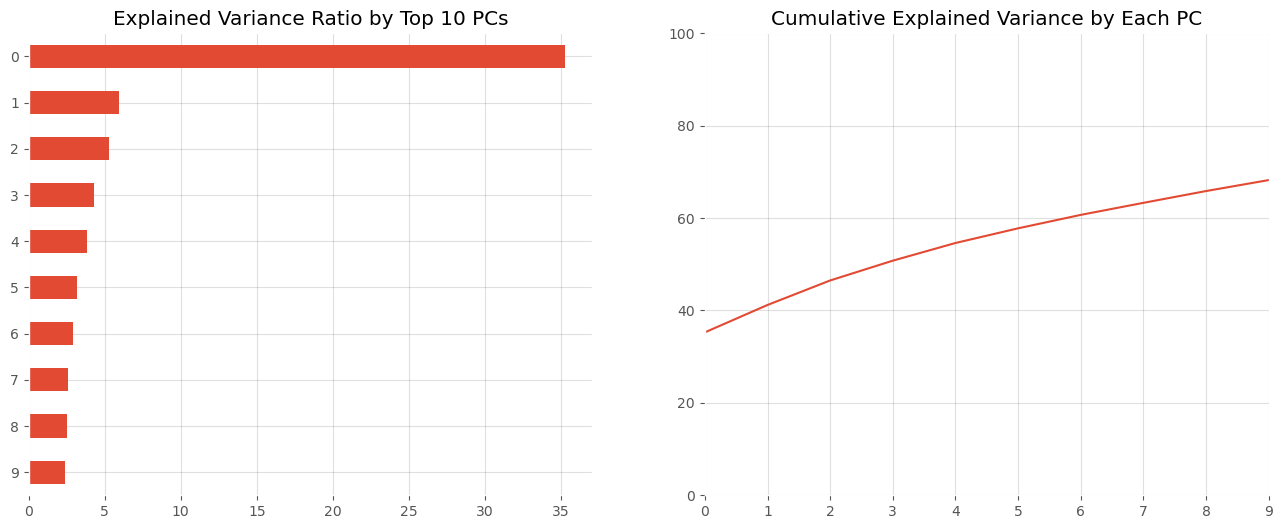

In [255]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [256]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

In [257]:
len(pca.components_)

30

In [258]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [259]:
weights = PCWeights()
weights

array([[ 2.764e-02,  3.172e-02,  2.788e-02,  3.708e-02,  3.140e-02,
         3.045e-02,  2.975e-02,  3.202e-02,  3.529e-02,  3.561e-02,
         3.931e-02,  3.772e-02,  3.609e-02,  3.371e-02,  4.267e-02,
         3.219e-02,  3.390e-02,  2.745e-02,  3.466e-02,  3.562e-02,
         2.648e-02,  3.099e-02,  3.706e-02,  3.214e-02,  3.560e-02,
         2.690e-02,  3.081e-02,  3.968e-02,  3.095e-02,  3.723e-02],
       [-5.377e+00,  5.151e+00, -5.340e+00, -3.434e+00,  4.456e+00,
        -7.766e-01, -1.887e+00, -6.985e-01, -4.994e+00, -1.308e+00,
        -2.189e+00, -2.495e+00, -1.243e+00,  5.153e+00, -3.297e+00,
         3.432e+00,  4.682e+00,  1.410e+00,  5.617e+00, -2.838e+00,
        -5.960e+00,  4.620e+00,  4.282e+00,  4.701e+00, -1.700e+00,
         1.204e+00,  1.440e+00, -2.422e+00,  1.351e+00, -5.400e-01],
       [ 1.165e+00,  7.085e-01,  2.648e+00, -9.068e-02,  4.479e-01,
        -4.187e-01, -7.739e+00,  3.695e+00,  1.833e+00, -7.659e+00,
         9.722e-02,  1.328e+00,  2.901e+00, -6

In [260]:
# Set the number of principal components to be considered
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = spx.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.354, 1.374, 1.301, 1.169, 1.104, 1.006, 0.963, 0.911, 0.902,
       0.87 , 0.846, 0.828, 0.815, 0.799, 0.794, 0.771, 0.759, 0.756,
       0.745, 0.734, 0.725, 0.72 , 0.703, 0.694, 0.679, 0.667, 0.552,
       0.523, 0.508, 0.45 ])

In [261]:
eigen_portfolios

AAPL        ABT       AMZN       BAC        BMY     BRK-B  \
Portfolio 0   0.027644   0.031724   0.027876  0.037080   0.031402  0.030449   
Portfolio 1  -5.376899   5.151259  -5.340469 -3.433907   4.455658 -0.776643   
Portfolio 2   1.165149   0.708545   2.647672 -0.090679   0.447867 -0.418677   
Portfolio 3   0.862100  -0.009633   0.516948 -1.539671   0.071210 -0.900156   
Portfolio 4 -26.043946 -44.447960 -18.146171  5.611057 -74.339199  6.608082   

                  COP       COST       CSCO        CVX  ...       NVDA  \
Portfolio 0  0.029746   0.032017   0.035292   0.035606  ...   0.026481   
Portfolio 1 -1.886590  -0.698460  -4.993900  -1.307679  ...  -5.959659   
Portfolio 2 -7.738558   3.695097   1.833011  -7.659207  ...   0.613682   
Portfolio 3  0.314170   0.376652   0.631250   0.327216  ...   0.610762   
Portfolio 4  8.045239  52.342015 -24.295747  12.549262  ... -47.818063   

                   PEP        PFE         PG        TMO        UNH         VZ  \
Portfolio 0   0.030994   0.037059   0.032141   0.035605   0.026905   0.030810   
Portfolio 1   4.619612   4.281888   4.701367  -1.700136   1.203767   1.440138   
Portfolio 2   0.044860   0.407727   0.260099   0.365899  -0.478199   0.949097   
Portfolio 3   0.109141   0.024984   0.176337   0.015107  -0.342595   0.034412   
Portfolio 4  70.521282 -62.260937  60.982287 -35.760376 -38.604348  38.234637   

                   WFC        WMT        XOM  
Portfolio 0   0.039682   0.030953   0.037228  
Portfolio 1  -2.422273   1.350523  -0.539993  
Portfolio 2   0.119907   3.448036  -6.988369  
Portfolio 3  -1.328924   0.289973   0.386953  
Portfolio 4  13.331907  63.759356  21.145603  

[5 rows x 30 columns]

In [262]:
eigen_portfolios.iloc[0]

AAPL     0.027644
ABT      0.031724
AMZN     0.027876
BAC      0.037080
BMY      0.031402
BRK-B    0.030449
COP      0.029746
COST     0.032017
CSCO     0.035292
CVX      0.035606
DHR      0.039309
DIS      0.037720
HD       0.036091
JNJ      0.033709
JPM      0.042671
KO       0.032185
LLY      0.033897
MCD      0.027448
MRK      0.034661
MSFT     0.035616
NVDA     0.026481
PEP      0.030994
PFE      0.037059
PG       0.032141
TMO      0.035605
UNH      0.026905
VZ       0.030810
WFC      0.039682
WMT      0.030953
XOM      0.037228
Name: Portfolio 0, dtype: float64

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

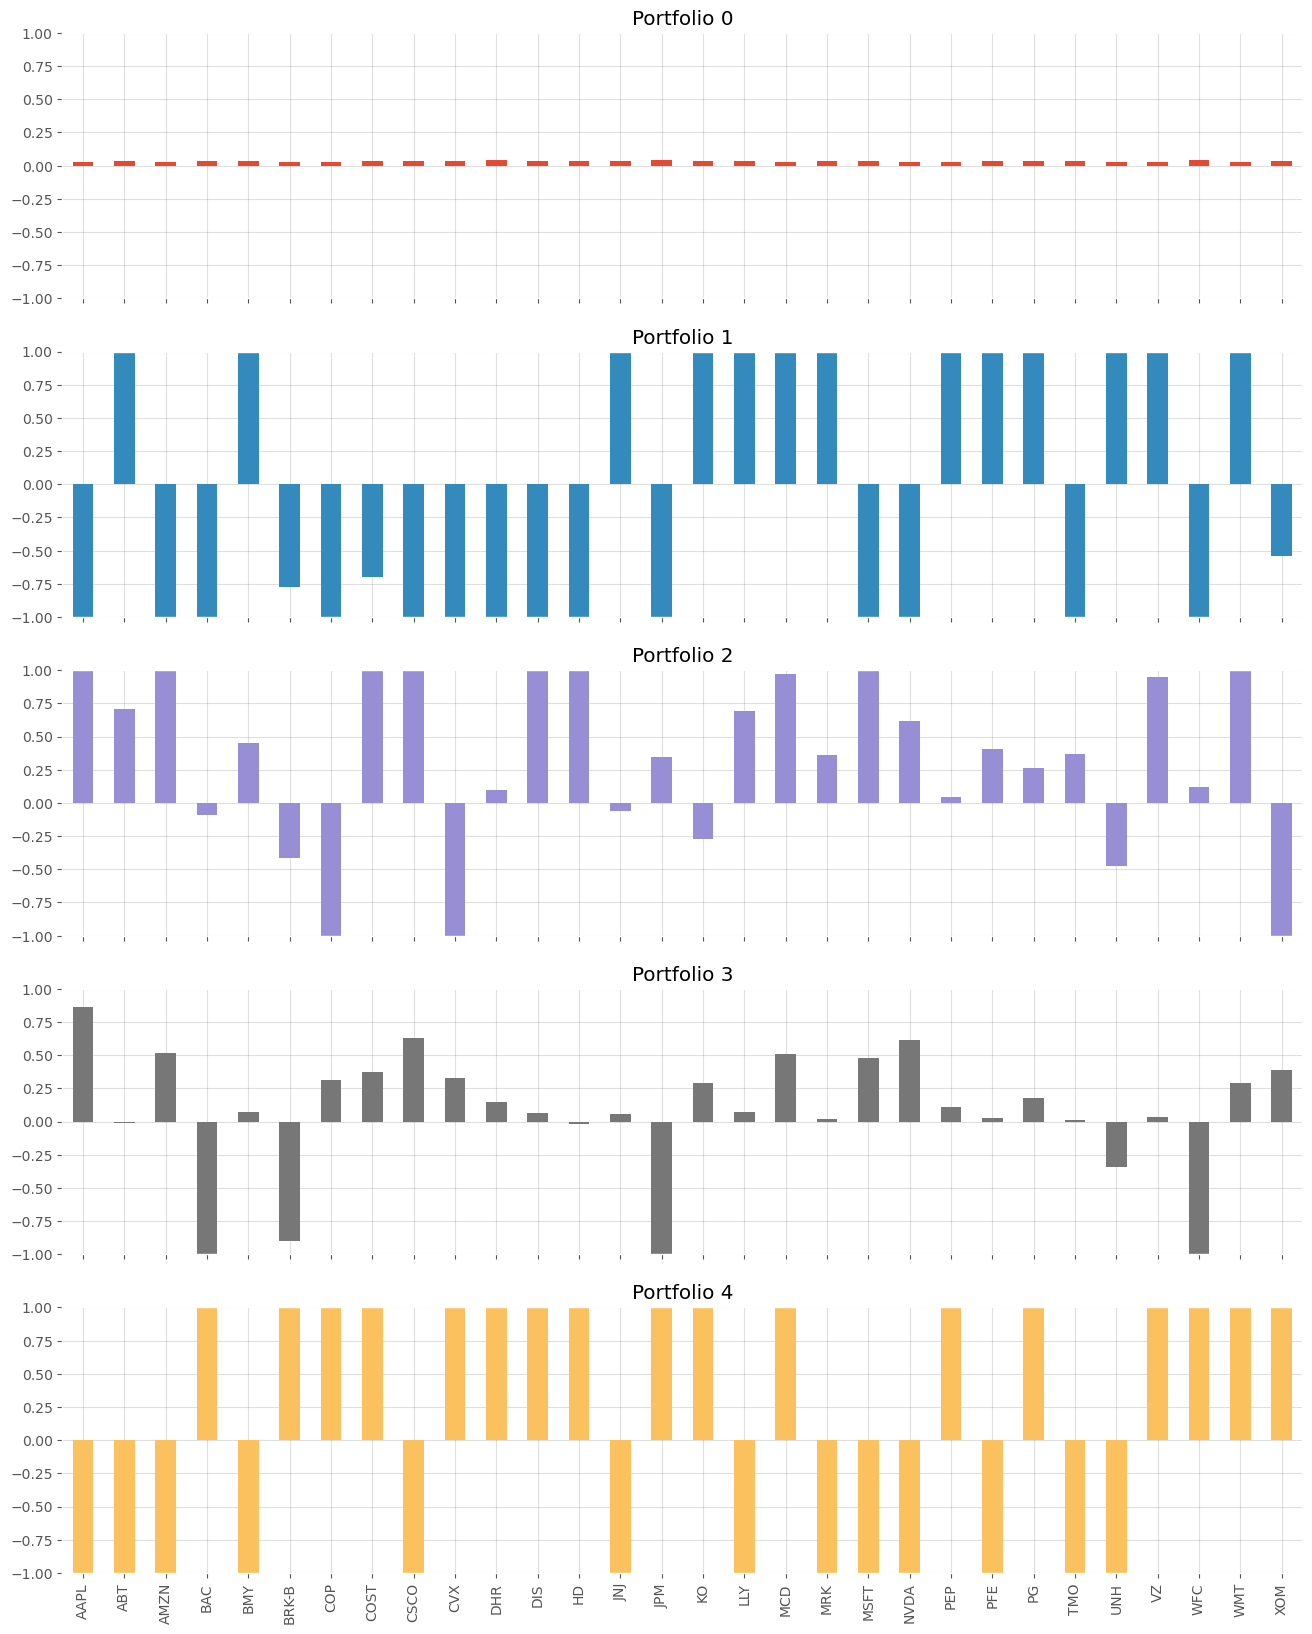

In [263]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

In [264]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [265]:
# Gift

def recommend_optimal_portfolio():

    # Number of eigenportfolios or principal components
    
    n_portfolios = len(pca.components_)

    # Initialize arrays for annualized return, volatility, and Sharpe ratio of each eigenportfolio
    
    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    # Variable to track the index of the eigenportfolio with the highest Sharpe ratio
    
    highest_sharpe = 0

    # Extract stock tickers from the scaled data
    
    stock_tickers =\
    (scaled_spx
     .columns 
     .values)

    n_tickers = len(stock_tickers)

    # Extract principal components
    
    PCs = pca.components_

    # Loop through each eigenportfolio

    for i in range(n_portfolios):

        # Normalize the weights of the i-th eigenportfolio
        
        pc_w = PCs[i] / sum(PCs[i])

        # Create a DataFrame for the eigenportfolio weights
        
        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        # Calculate returns for the eigenportfolio
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        # Calculate annualized return, volatility, and Sharpe ratio for the eigenportfolio
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        # Store the metrics in their respective arrays
        
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        # Replace NaN values in Sharpe metric array with zeros
        
        sharpe_metric = np.nan_to_num(sharpe_metric)

    # Let's find a portfolio with the HIGHEST Sharpe Ratio

    highest_sharpe = np.argmax(sharpe_metric)

    # Print the details of the eigenportfolio with the highest Sharpe ratio
    
    print("Our Eigen Portfolio #%d with the highest Sharpe\
           \nReturn %.2f%%,\vol = %.2f%%, \nSharpe = %.2f" %
         (highest_sharpe,
          annualized_ret[highest_sharpe] * 100,
          annualized_vol[highest_sharpe] * 100,
          sharpe_metric[highest_sharpe]
         )
         )

    # Create a DataFrame to store the results for all eigenportfolios
    
    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )

    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [266]:
recommend_optimal_portfolio()

Our Eigen Portfolio #4 with the highest Sharpe           
Return inf%,ol = 4129.46%, 
Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
      Return        Vol         Sharpe
4        inf  41.294636  1.797693e+308
0   0.125862   0.128558   9.790266e-01
3   0.167547   0.675646   2.479798e-01
11 -0.058579   1.413418  -4.144497e-02
10 -1.000000  12.997118  -7.694013e-02
29 -1.000000   6.870223  -1.455557e-01
27 -0.167551   1.138195  -1.472077e-01
22 -1.000000   6.501580  -1.538088e-01
26 -0.447683   2.095019  -2.136894e-01
23 -0.999995   4.145879  -2.412023e-01


In [267]:
def FindPortfolioVisual():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_spx.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

Our Eigen Portfolio #4 with the highest Sharpe. Return inf%, vol = 4129.46%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
      Return        Vol         Sharpe
4        inf  41.294636  1.797693e+308
0   0.125862   0.128558   9.790266e-01
3   0.167547   0.675646   2.479798e-01
11 -0.058579   1.413418  -4.144497e-02
10 -1.000000  12.997118  -7.694013e-02
29 -1.000000   6.870223  -1.455557e-01
27 -0.167551   1.138195  -1.472077e-01
22 -1.000000   6.501580  -1.538088e-01
26 -0.447683   2.095019  -2.136894e-01
23 -0.999995   4.145879  -2.412023e-01
9  -0.999221   3.825438  -2.612043e-01
15 -0.999403   3.816810  -2.618426e-01
24 -0.999037   3.756154  -2.659734e-01
8  -0.997238   3.391388  -2.940502e-01
17 -0.999097   3

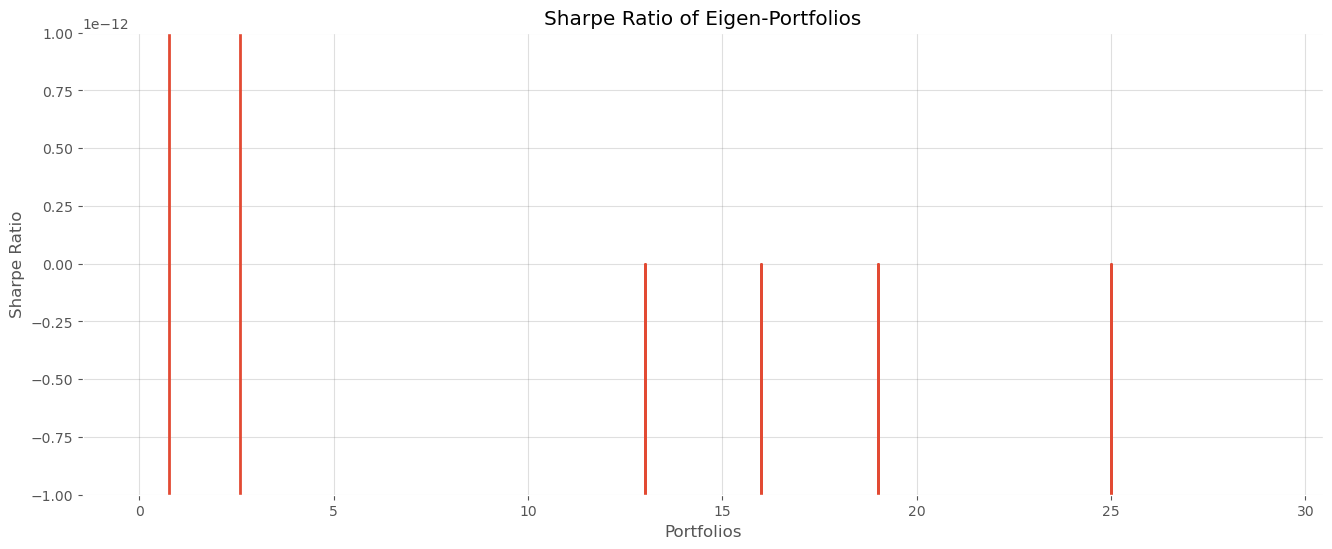

In [268]:
FindPortfolioVisual()

In [269]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

In [270]:
len(weights)

30

In [274]:
ans = [0, 11, 20, 28]

Our PCA-based Portfolio:
Return = 28.65%
Volatility = 10.38%
Sharpe = 2.76


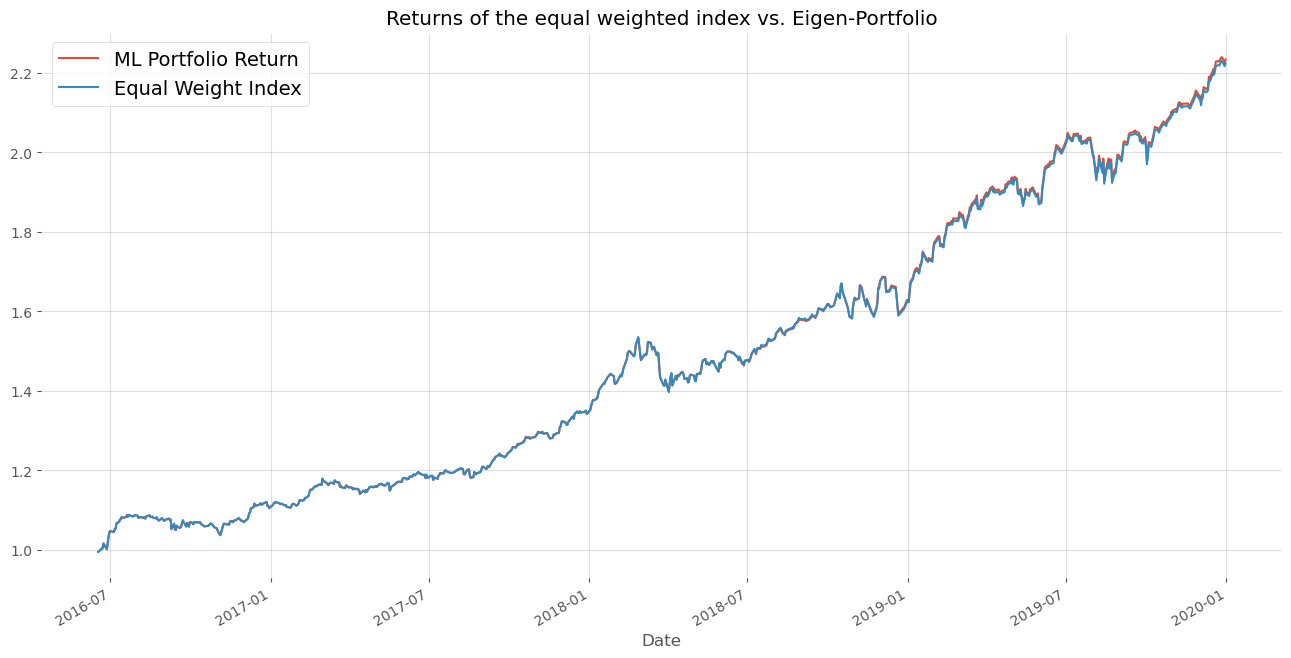

Our PCA-based Portfolio:
Return = 243.84%
Volatility = 110.89%
Sharpe = 2.20


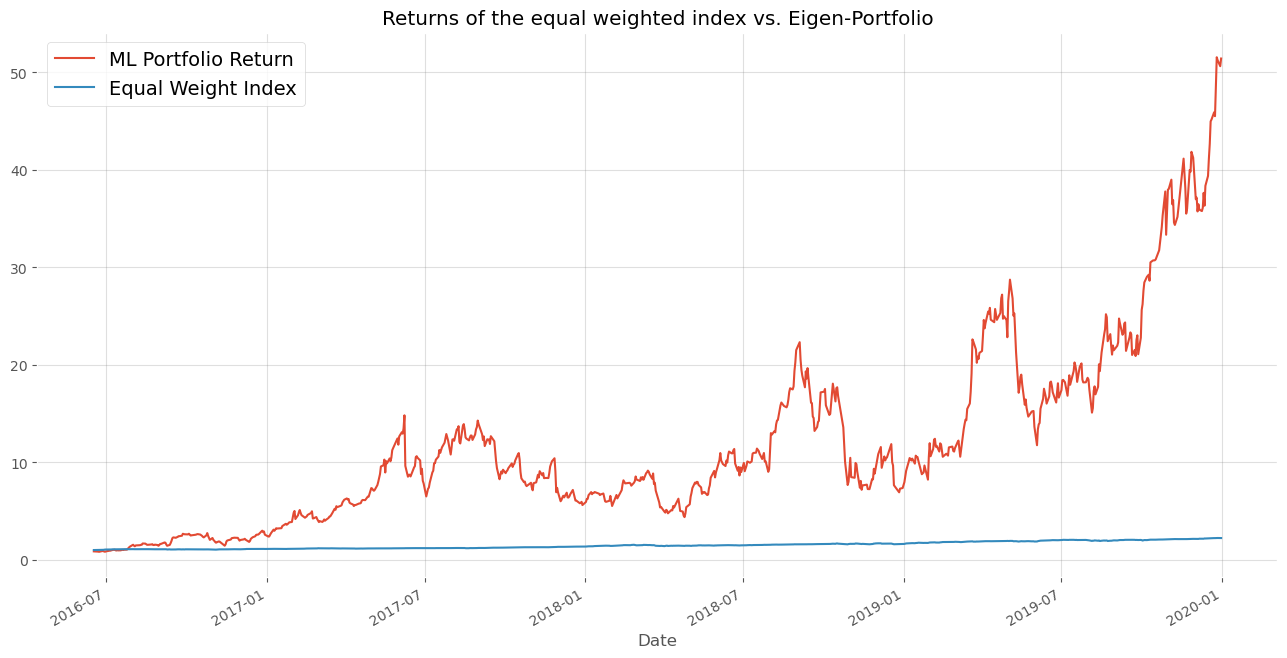

Our PCA-based Portfolio:
Return = 34.53%
Volatility = 85.83%
Sharpe = 0.40


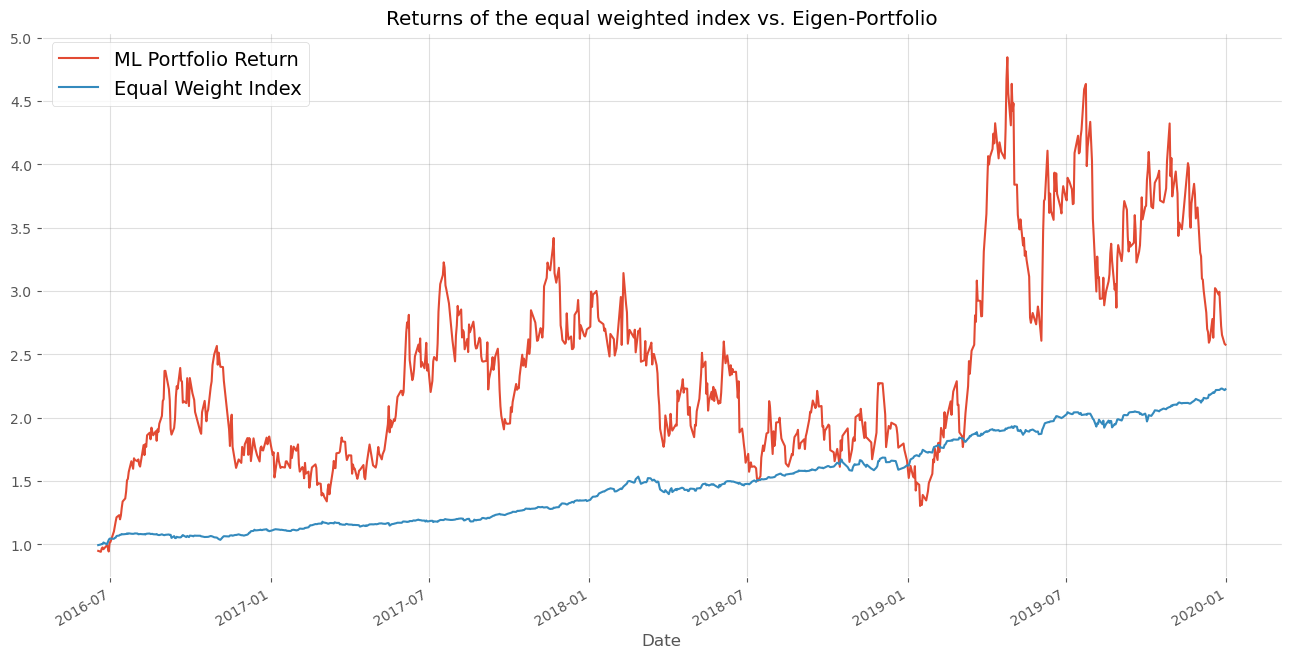

Our PCA-based Portfolio:
Return = 224.47%
Volatility = 122.70%
Sharpe = 1.83


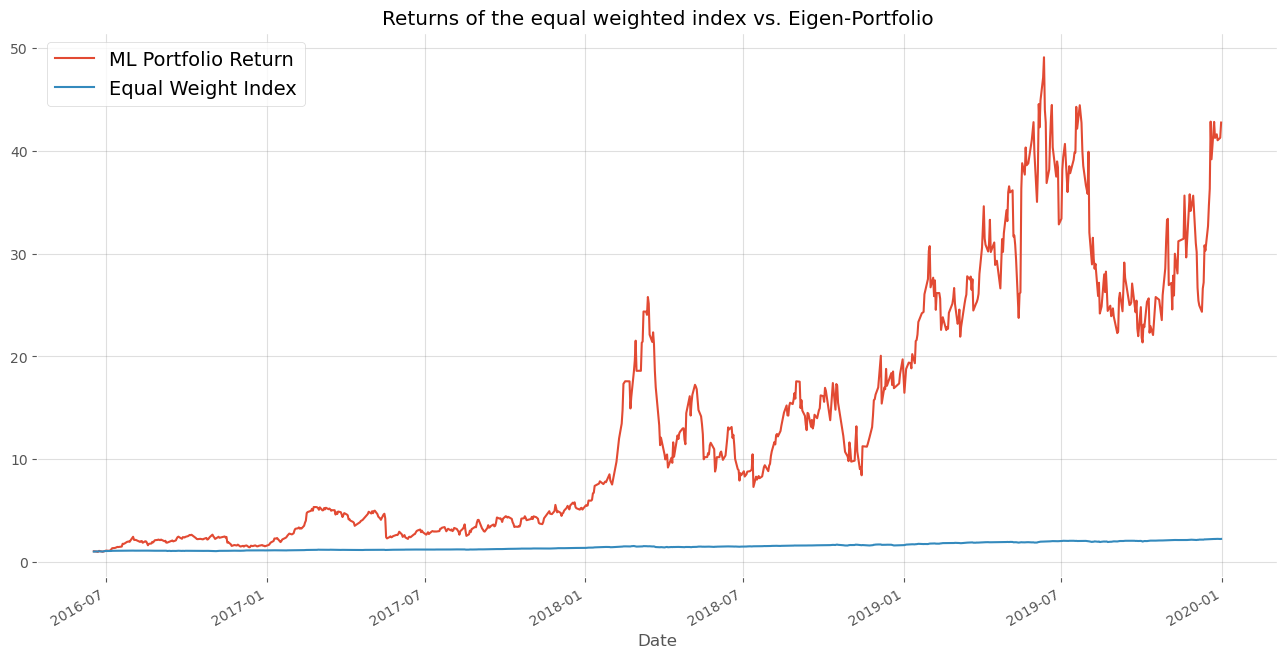

In [275]:
for i in ans:
    backtest_PCA_porfolios(eigen = weights[i]) 

Some very High Sharpe Ratio Eigen-Portfolios listed as below:

In [276]:
performing_portfolios = pd.DataFrame(weights[ans])
performing_portfolios.columns = eigen_portfolios.columns
performing_portfolios['weight_sum'] = performing_portfolios.sum(axis = 1)
performing_portfolios

AAPL       ABT      AMZN       BAC       BMY     BRK-B       COP  \
0  0.027644  0.031724  0.027876  0.037080  0.031402  0.030449  0.029746   
1  2.504793 -0.447099  0.466267 -0.303888  0.678043  2.321887  0.121689   
2  0.506242  1.083504  0.634479  0.214892  0.328061  0.243847  0.051735   
3 -0.135772  0.155424 -0.172213 -1.288564 -0.046275 -0.058695  5.955651   

       COST      CSCO       CVX  ...       PEP       PFE        PG       TMO  \
0  0.032017  0.035292  0.035606  ...  0.030994  0.037059  0.032141  0.035605   
1  0.261853 -1.106717 -0.014840  ... -0.252205 -0.080581  0.140344 -0.701071   
2 -1.176514  0.897874  0.162889  ...  1.034832 -0.150896 -0.709707  1.136795   
3 -0.155250  0.282225 -1.688109  ...  0.217097  0.085239  0.152624  0.124622   

        UNH        VZ       WFC       WMT       XOM  weight_sum  
0  0.026905  0.030810  0.039682  0.030953  0.037228         1.0  
1 -0.419298  1.388890 -0.254219 -0.250481 -0.056926         1.0  
2  0.105234  0.078146 -0.157086  1.358422  0.227453         1.0  
3 -0.078245  0.143163  0.125082  0.367829 -4.514636         1.0  

[4 rows x 31 columns]

Our PCA-based Portfolio:
Return = 28.65%
Volatility = 10.38%
Sharpe = 2.76


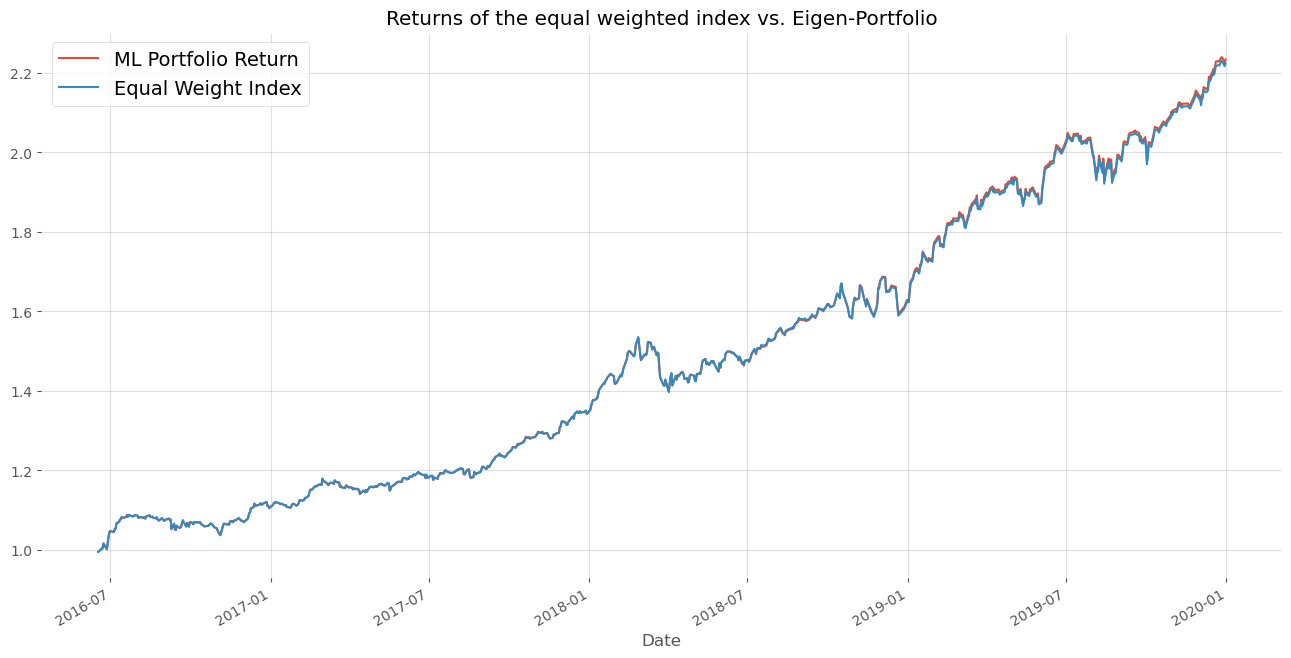

Our PCA-based Portfolio:
Return = -98.07%
Volatility = 277.88%
Sharpe = -0.35


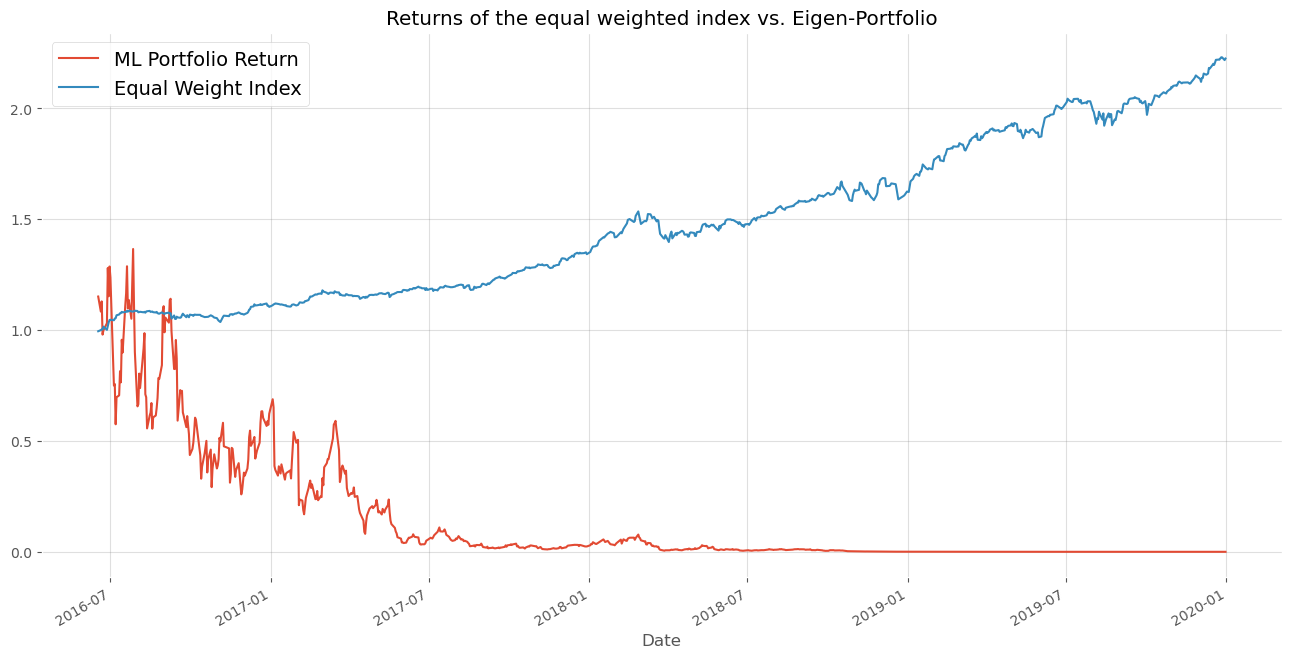

Our PCA-based Portfolio:
Return = -37.81%
Volatility = 230.09%
Sharpe = -0.16


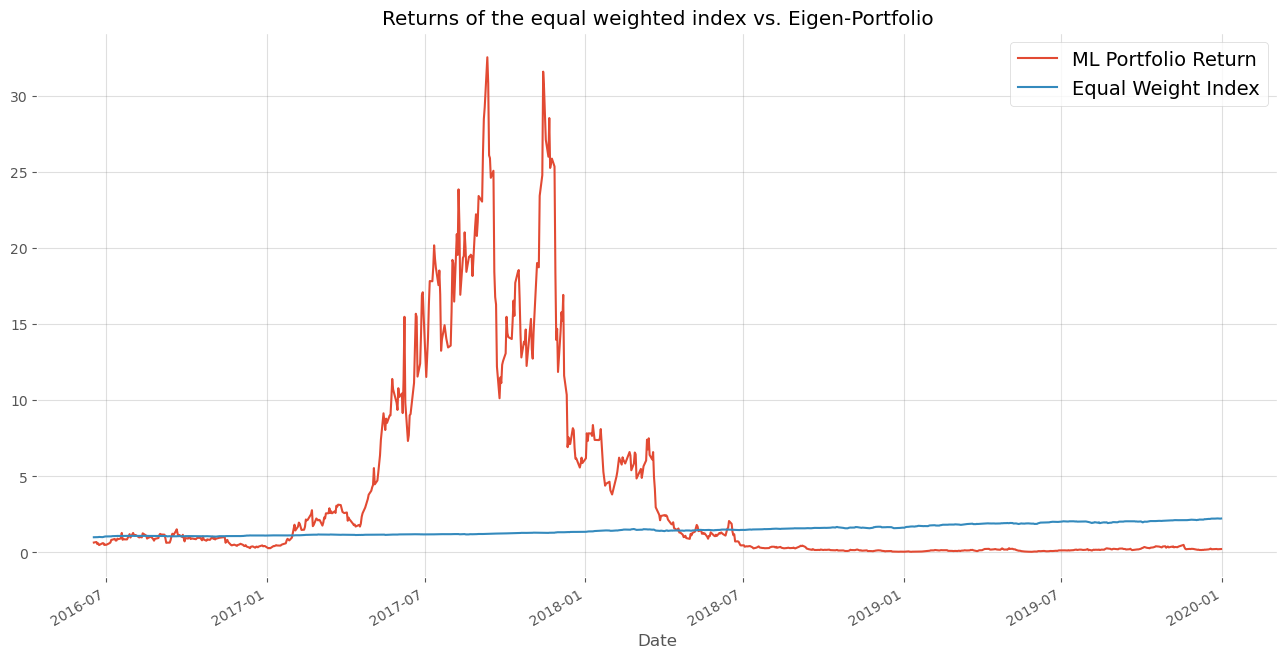

Our PCA-based Portfolio:
Return = -7.64%
Volatility = 45.15%
Sharpe = -0.17


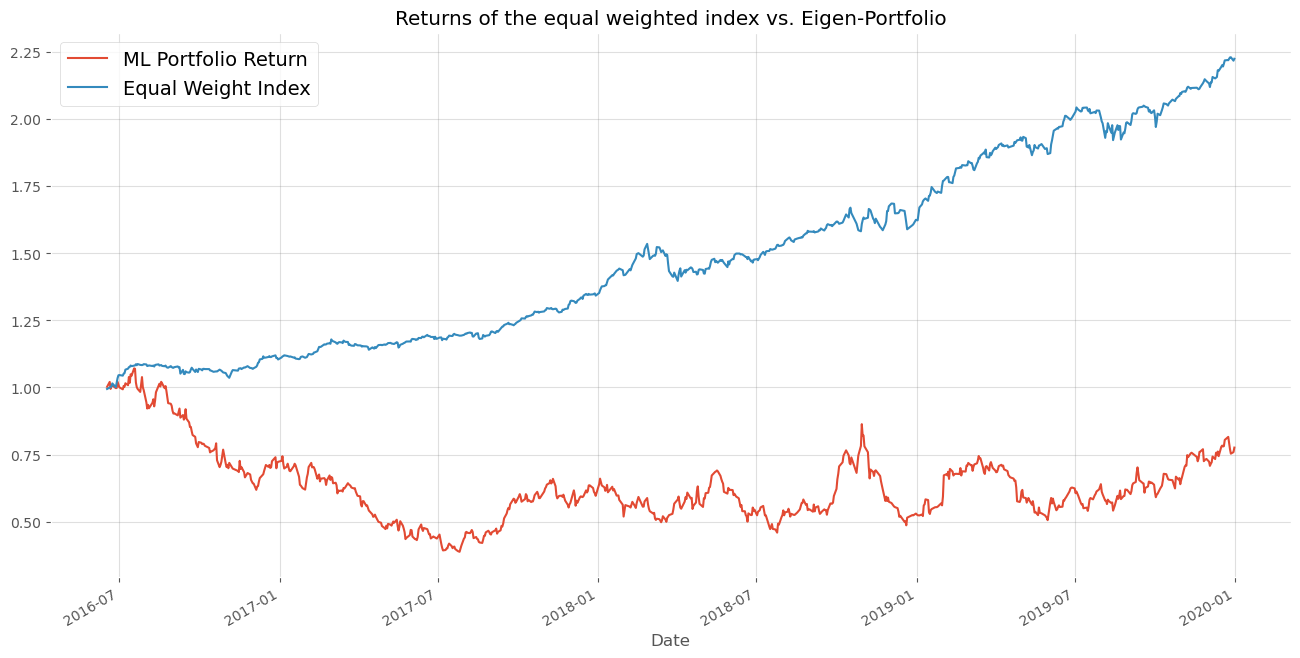

Our PCA-based Portfolio:
Return = nan%
Volatility = 3482.91%
Sharpe = nan


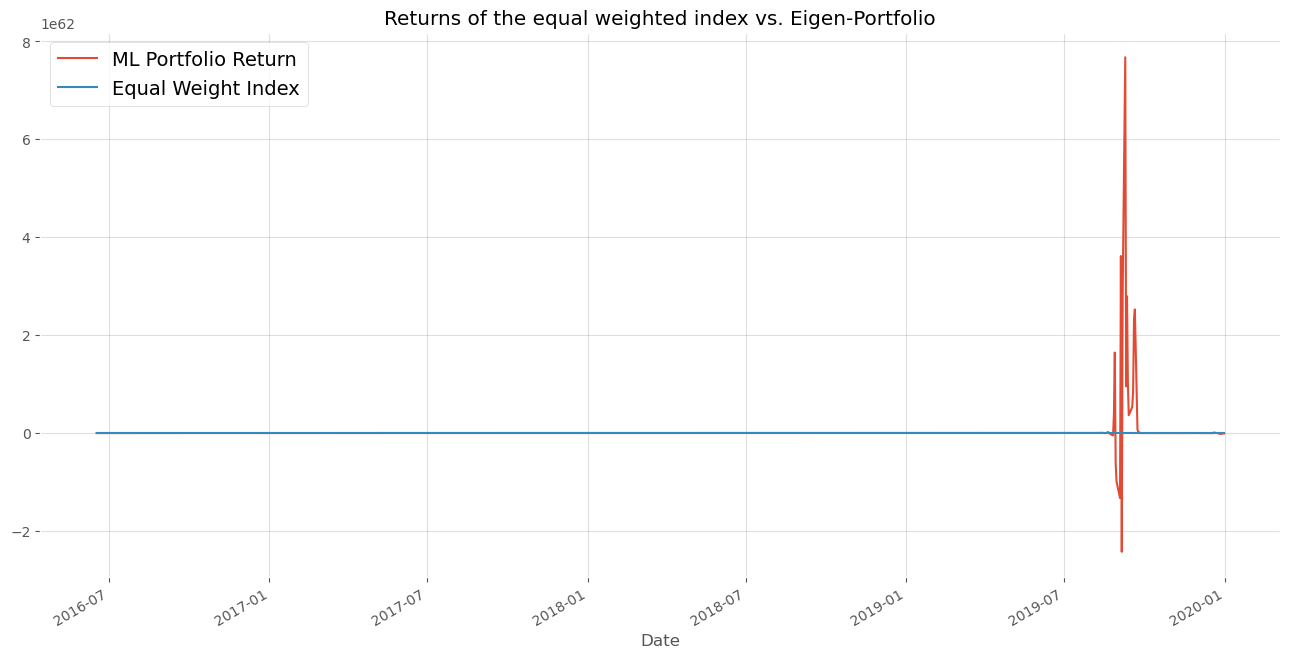

Our PCA-based Portfolio:
Return = -88.30%
Volatility = 163.39%
Sharpe = -0.54


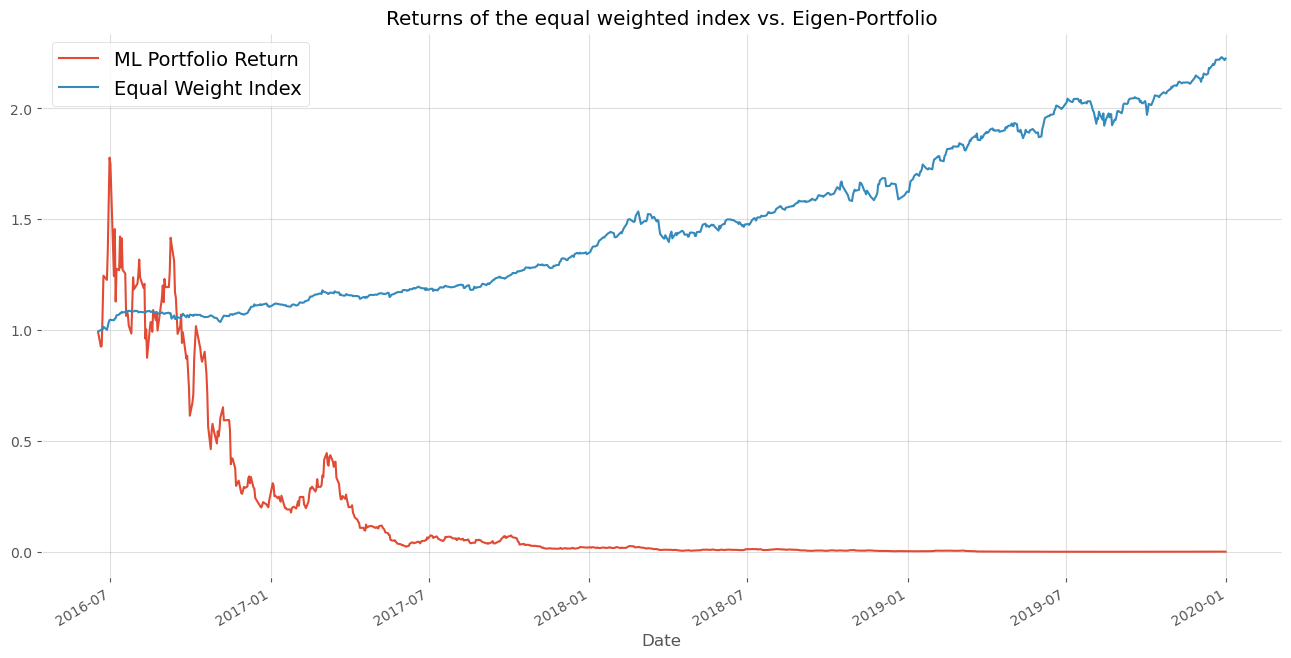

Our PCA-based Portfolio:
Return = -45.57%
Volatility = 79.35%
Sharpe = -0.57


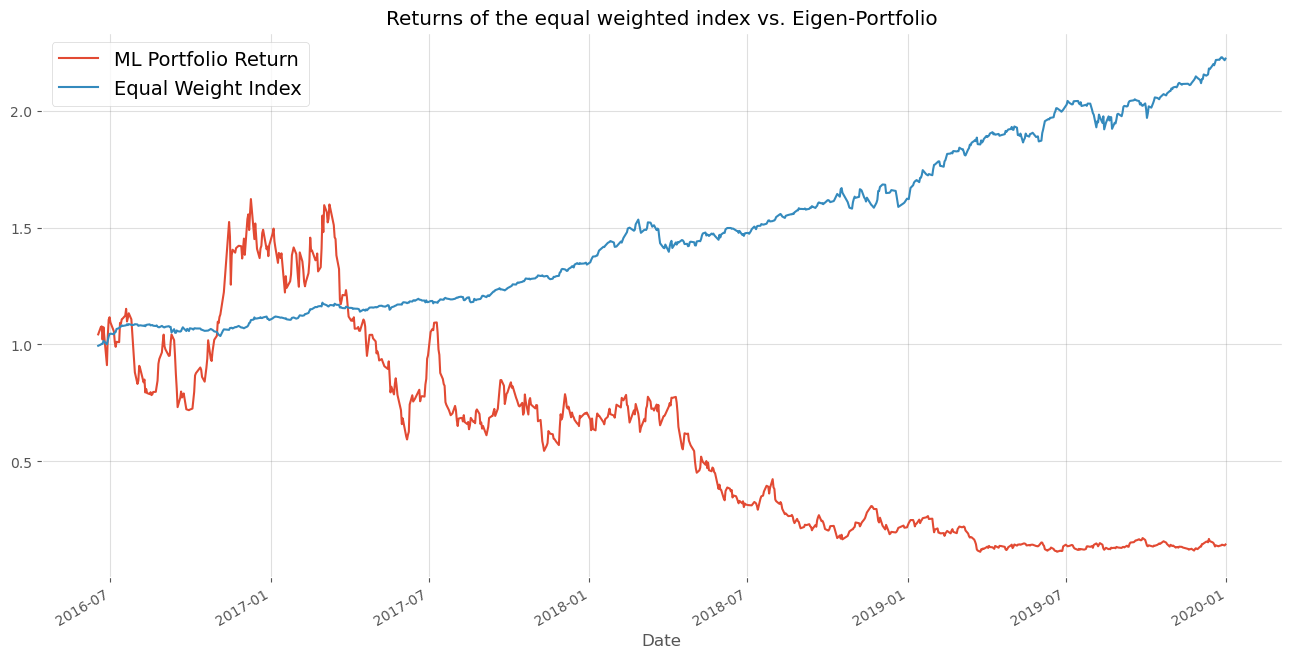

Our PCA-based Portfolio:
Return = -61.42%
Volatility = 85.02%
Sharpe = -0.72


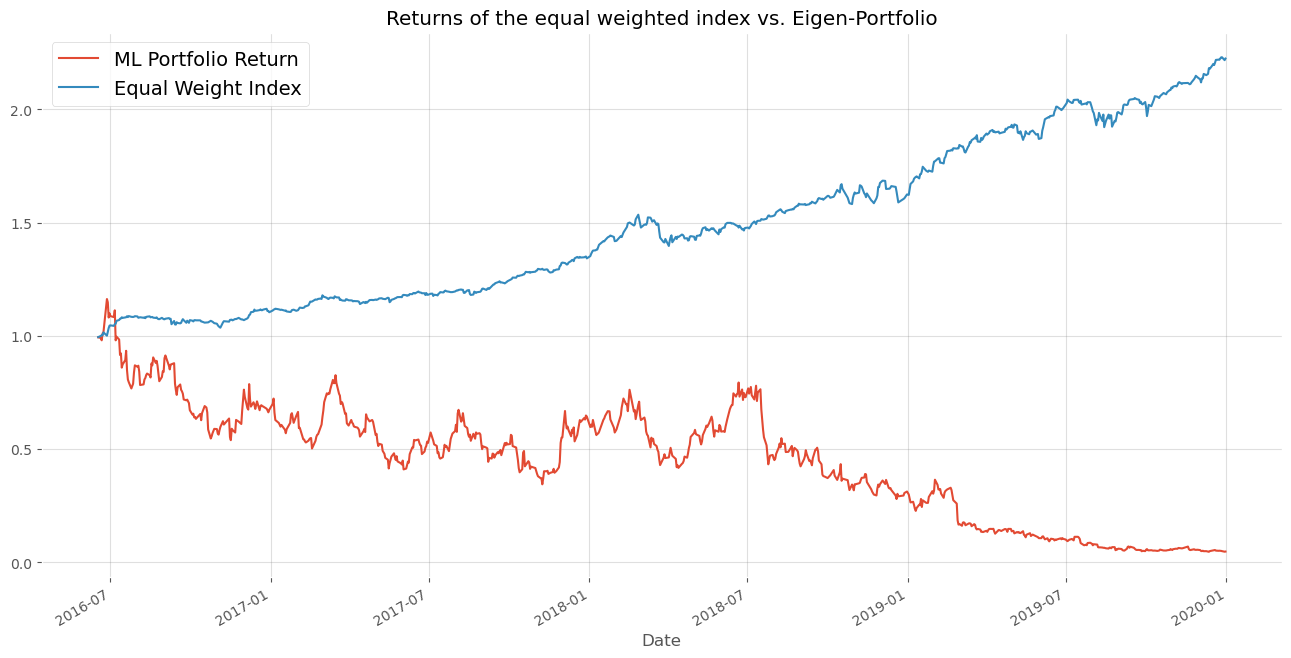

Our PCA-based Portfolio:
Return = -25.02%
Volatility = 212.29%
Sharpe = -0.12


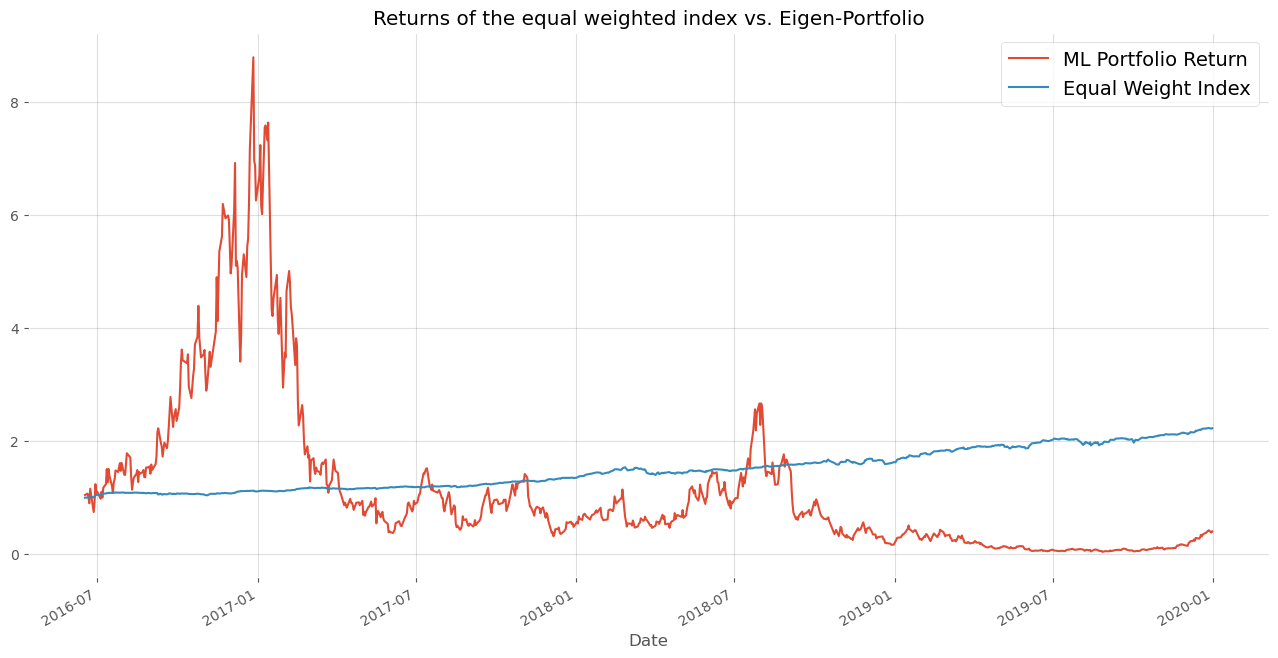

Our PCA-based Portfolio:
Return = -57.77%
Volatility = 277.29%
Sharpe = -0.21


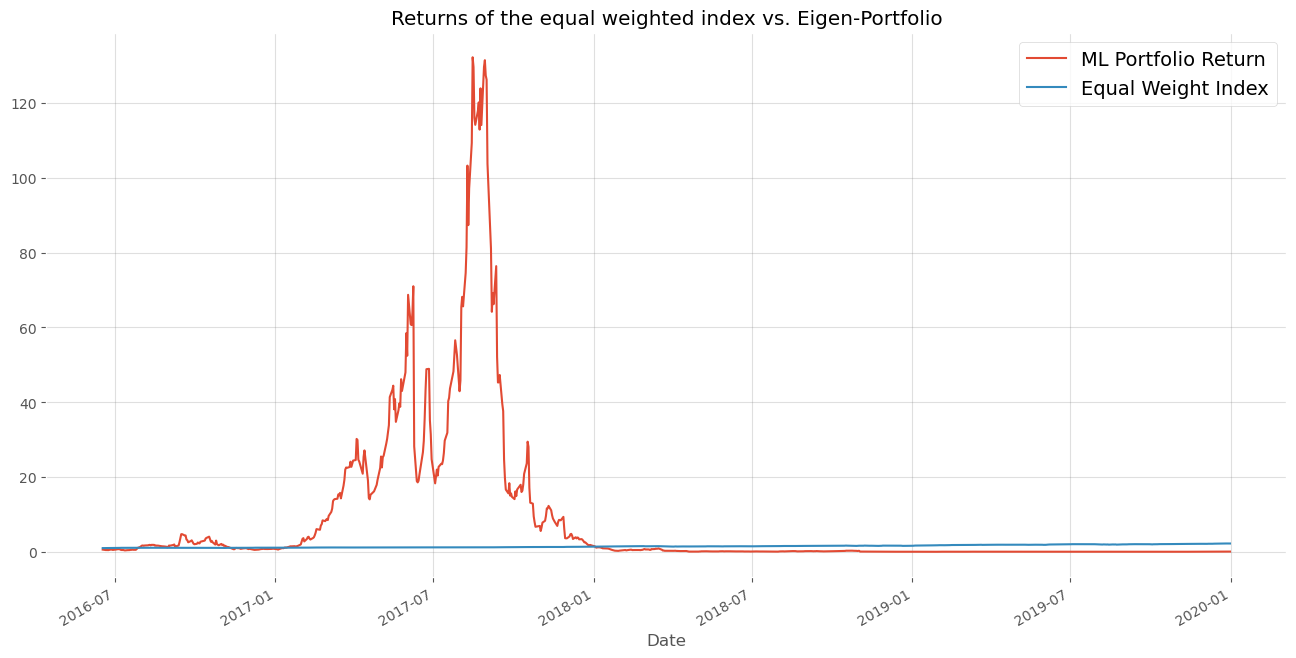

Our PCA-based Portfolio:
Return = nan%
Volatility = 959.81%
Sharpe = nan


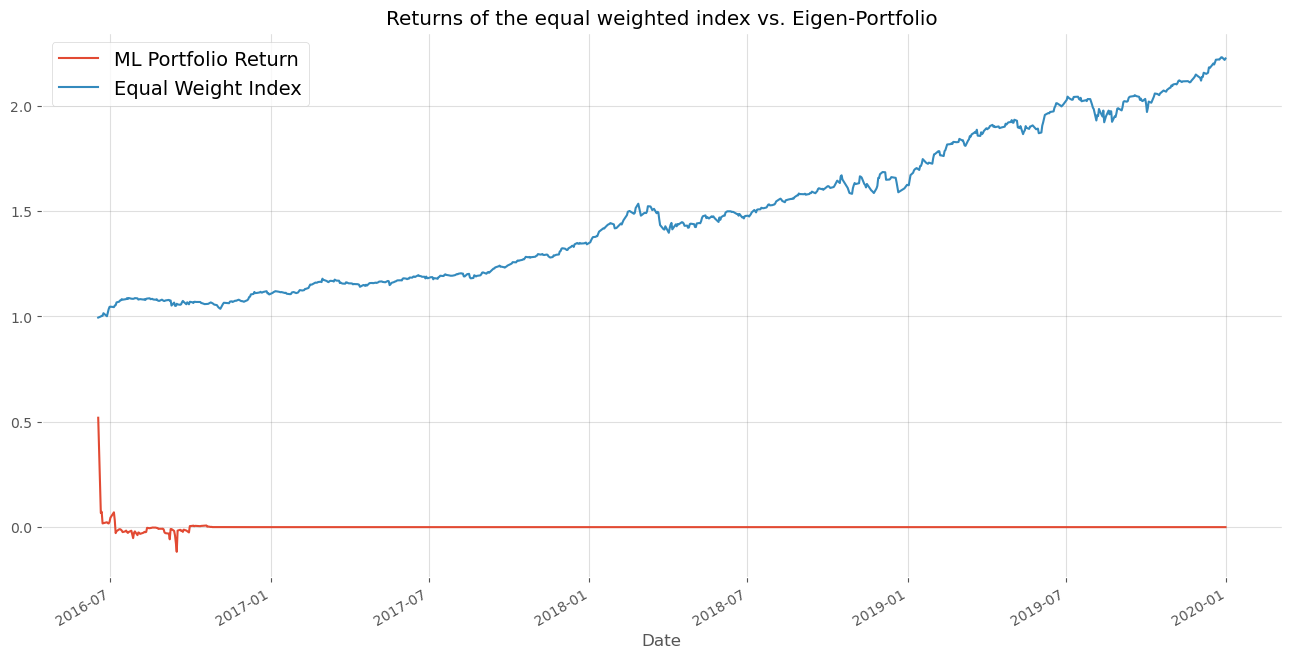

Our PCA-based Portfolio:
Return = 243.84%
Volatility = 110.89%
Sharpe = 2.20


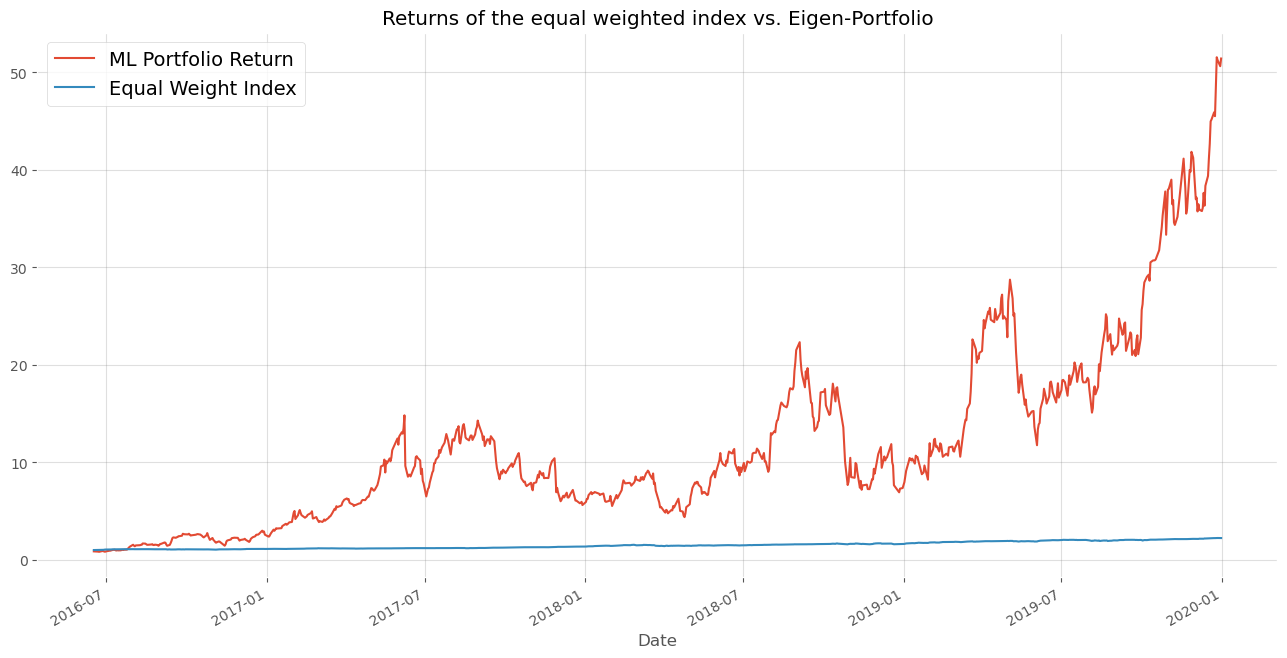

Our PCA-based Portfolio:
Return = -76.24%
Volatility = 85.82%
Sharpe = -0.89


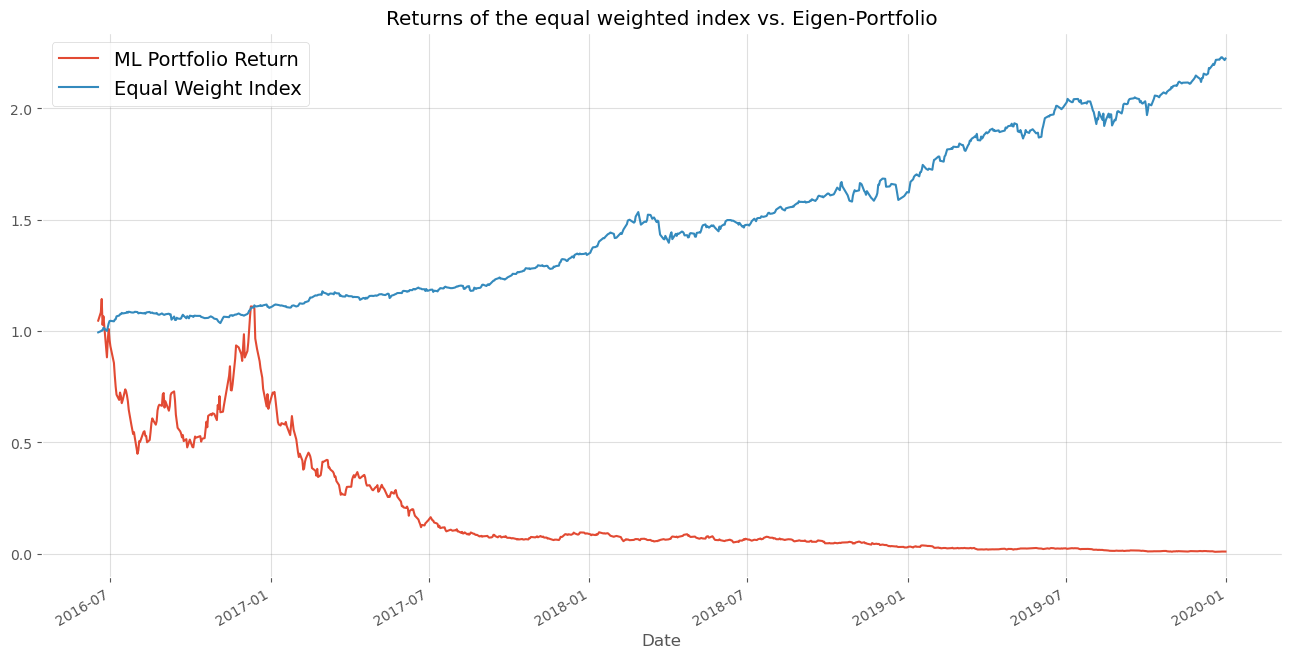

Our PCA-based Portfolio:
Return = nan%
Volatility = 1318.82%
Sharpe = nan


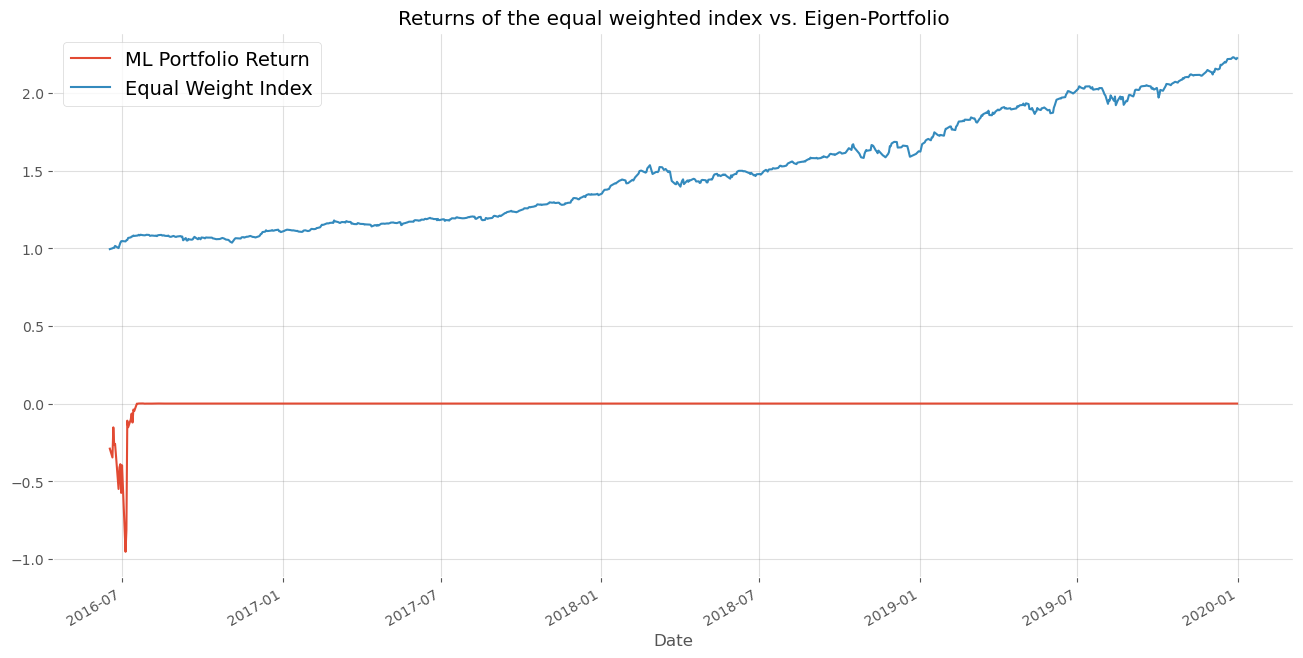

Our PCA-based Portfolio:
Return = 0.34%
Volatility = 84.80%
Sharpe = 0.00


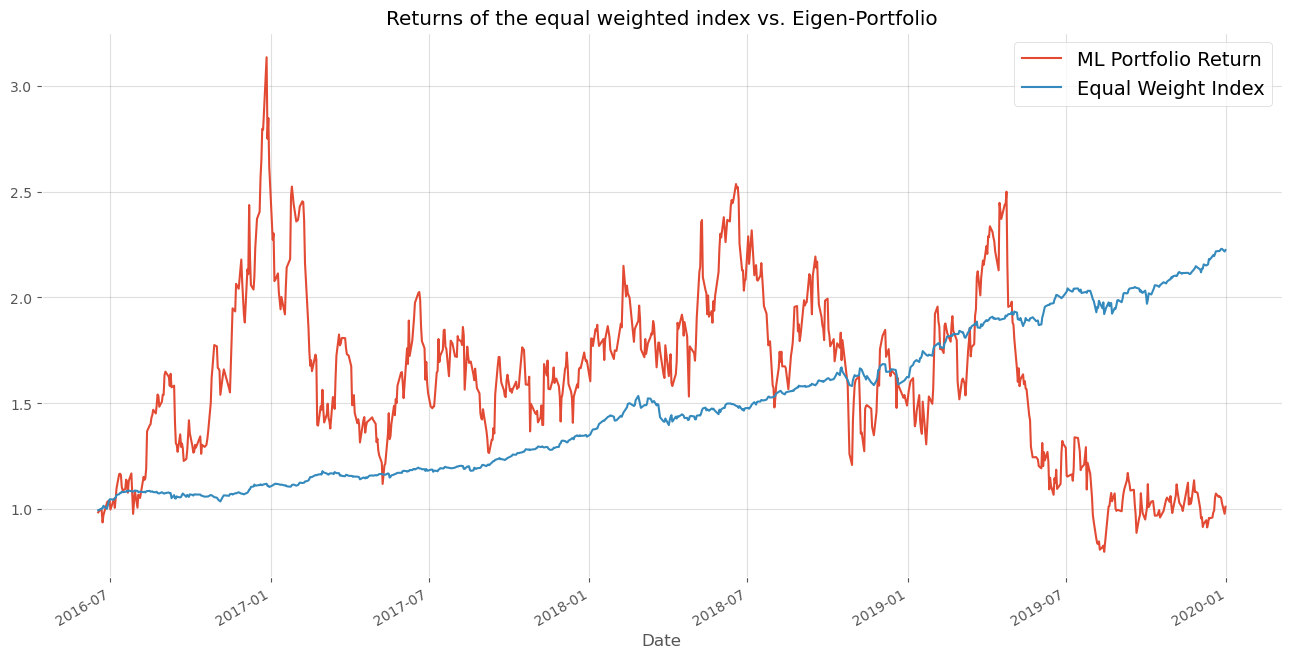

Our PCA-based Portfolio:
Return = -99.93%
Volatility = 336.56%
Sharpe = -0.30


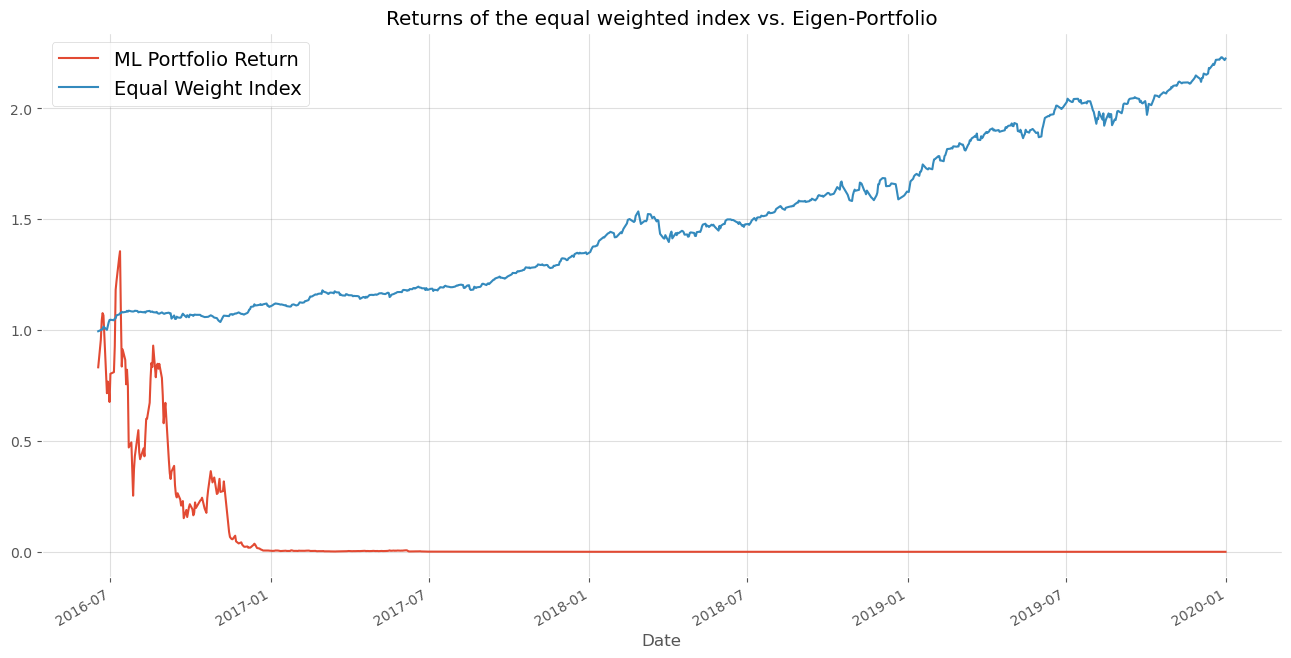

Our PCA-based Portfolio:
Return = -99.75%
Volatility = 256.14%
Sharpe = -0.39


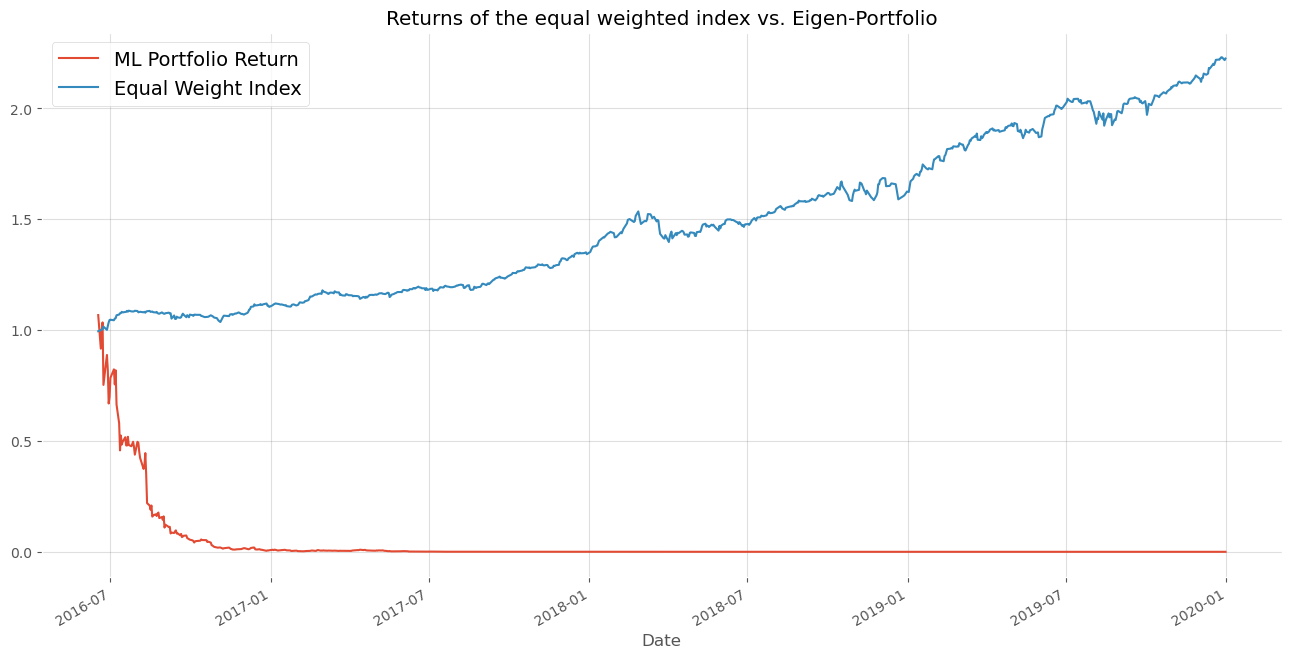

Our PCA-based Portfolio:
Return = -84.39%
Volatility = 308.52%
Sharpe = -0.27


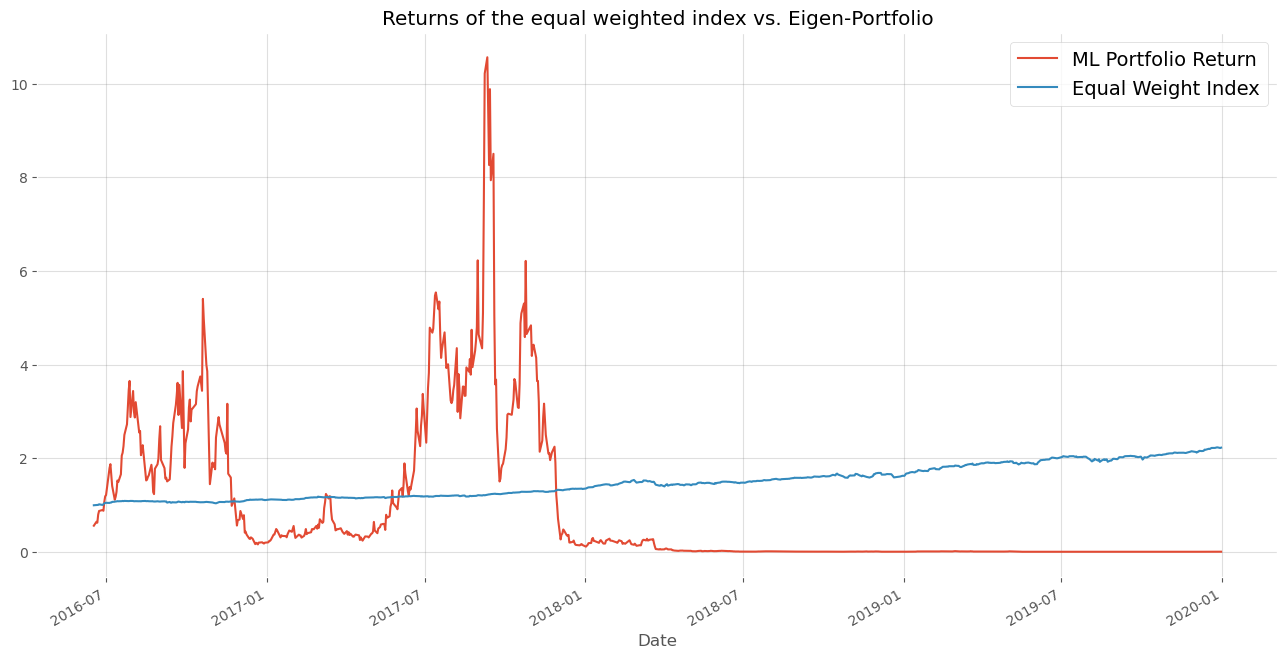

Our PCA-based Portfolio:
Return = -97.49%
Volatility = 240.15%
Sharpe = -0.41


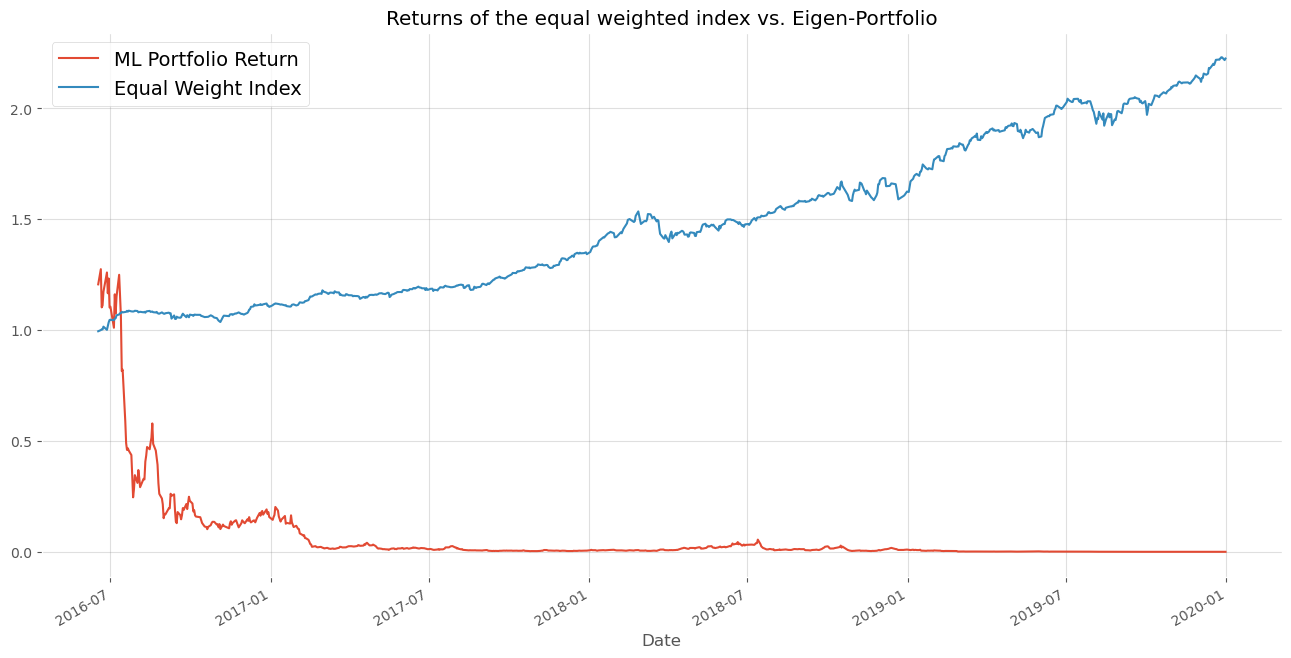

Our PCA-based Portfolio:
Return = nan%
Volatility = 1759.47%
Sharpe = nan


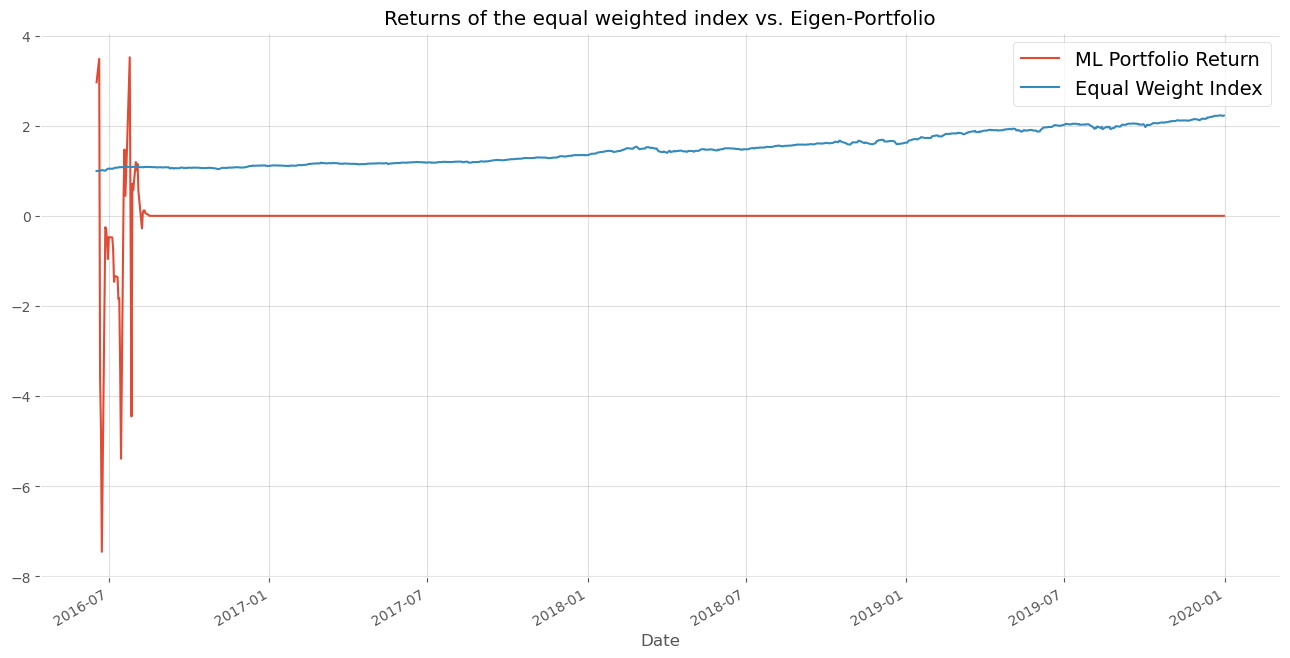

Our PCA-based Portfolio:
Return = 34.53%
Volatility = 85.83%
Sharpe = 0.40


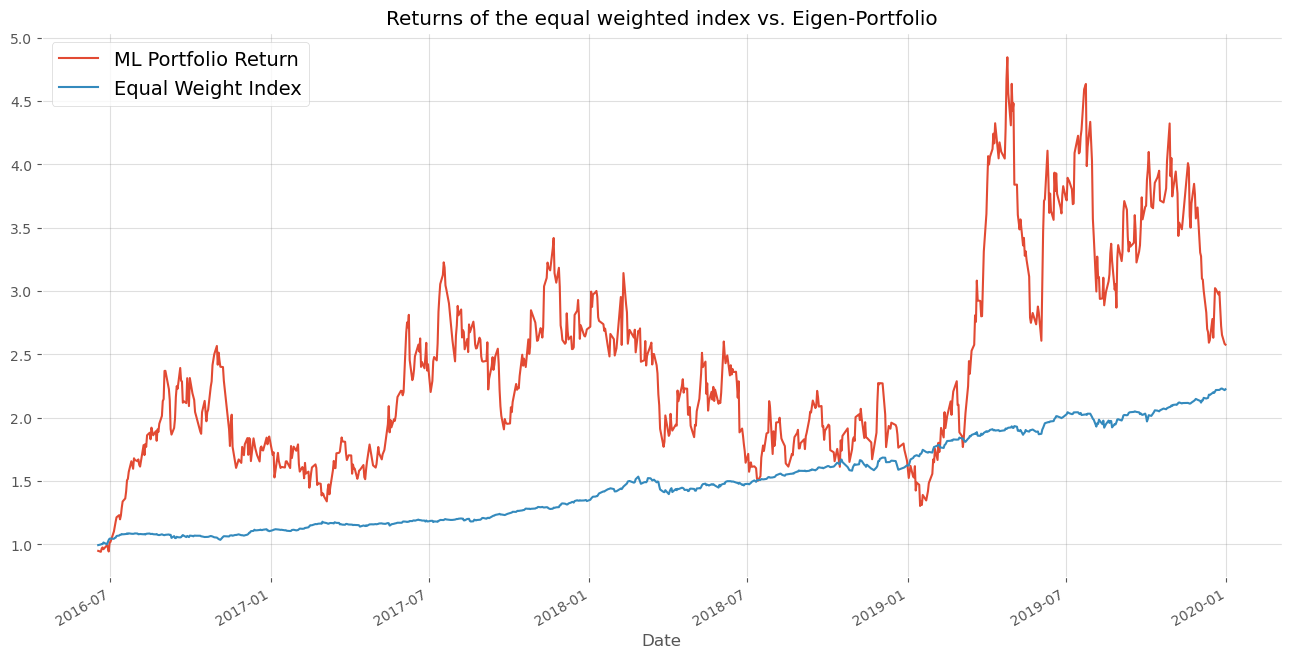

Our PCA-based Portfolio:
Return = -50.03%
Volatility = 140.75%
Sharpe = -0.36


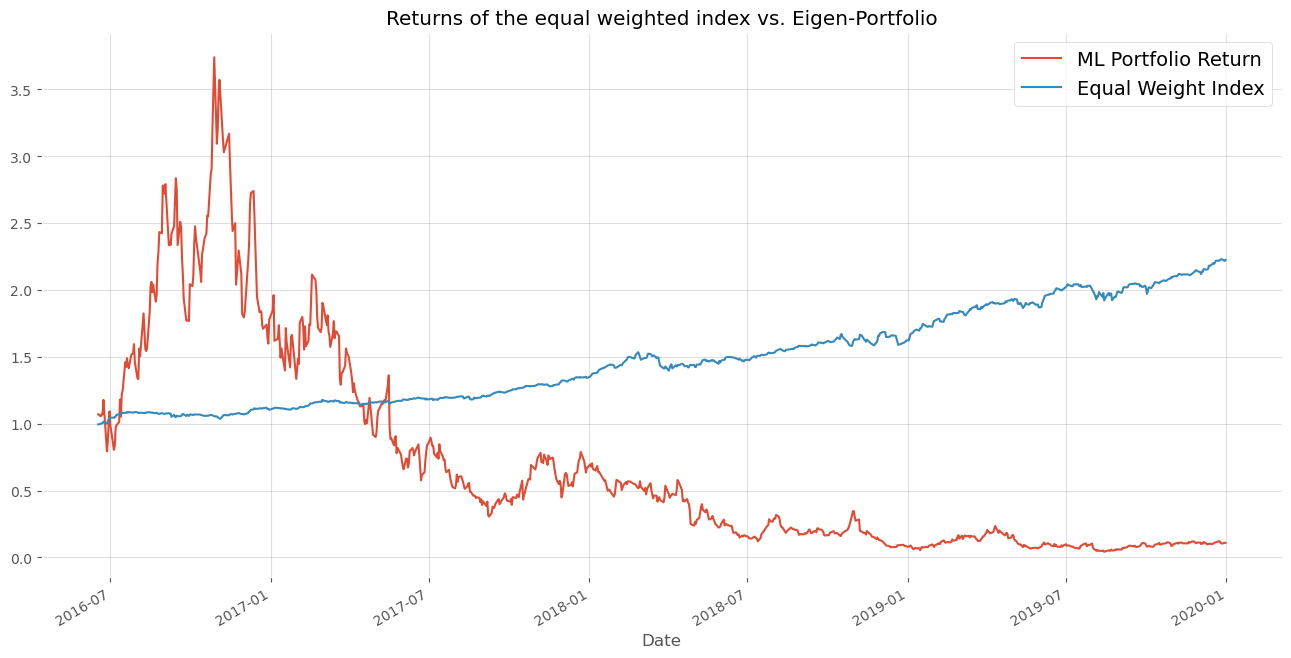

Our PCA-based Portfolio:
Return = -100.00%
Volatility = 526.13%
Sharpe = -0.19


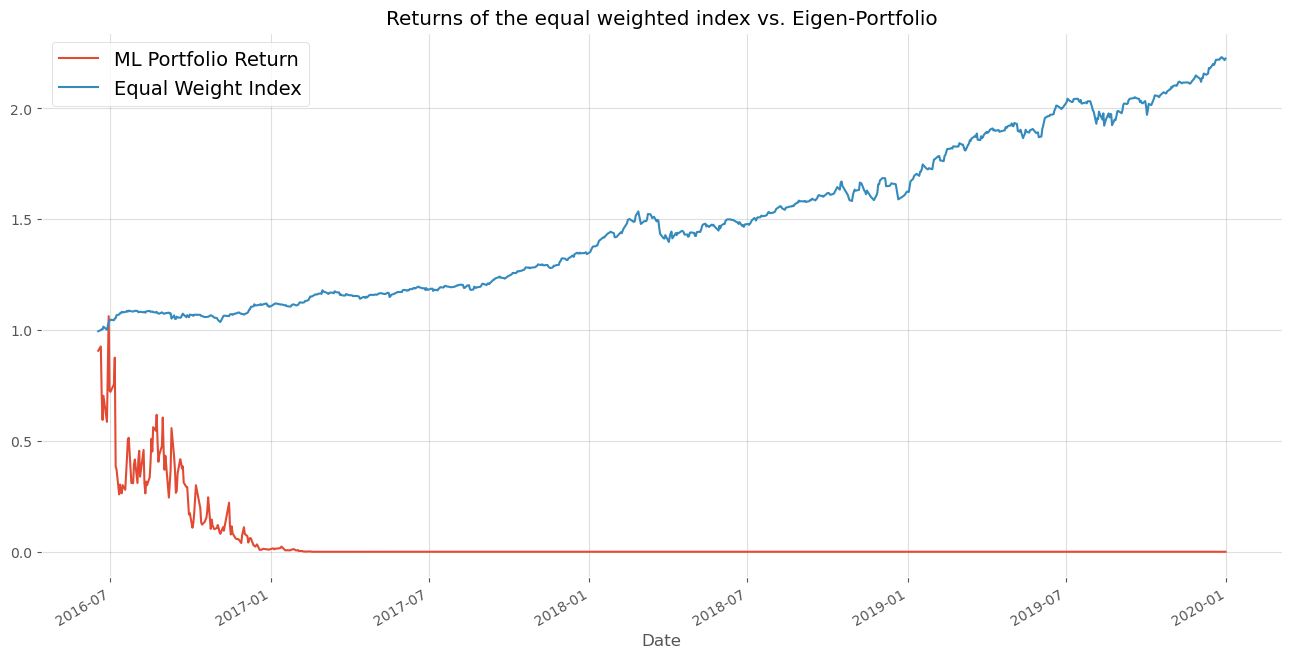

Our PCA-based Portfolio:
Return = -99.99%
Volatility = 367.58%
Sharpe = -0.27


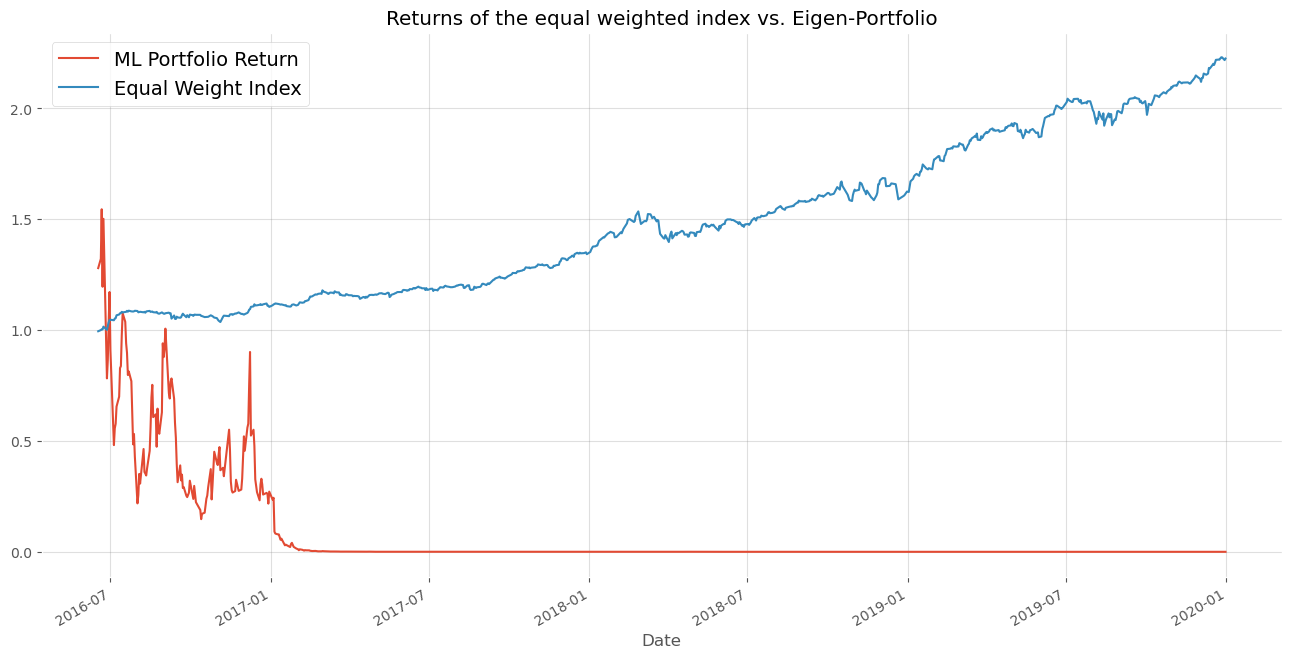

Our PCA-based Portfolio:
Return = -99.99%
Volatility = 381.50%
Sharpe = -0.26


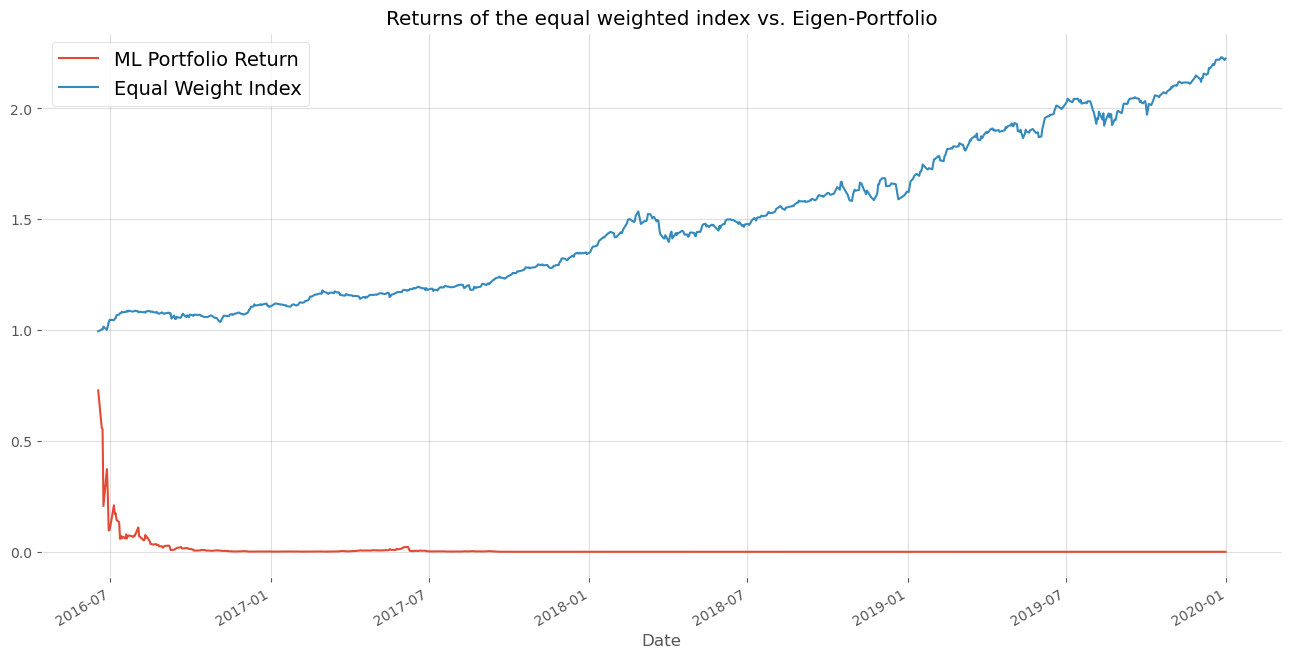

Our PCA-based Portfolio:
Return = -100.00%
Volatility = 545.18%
Sharpe = -0.18


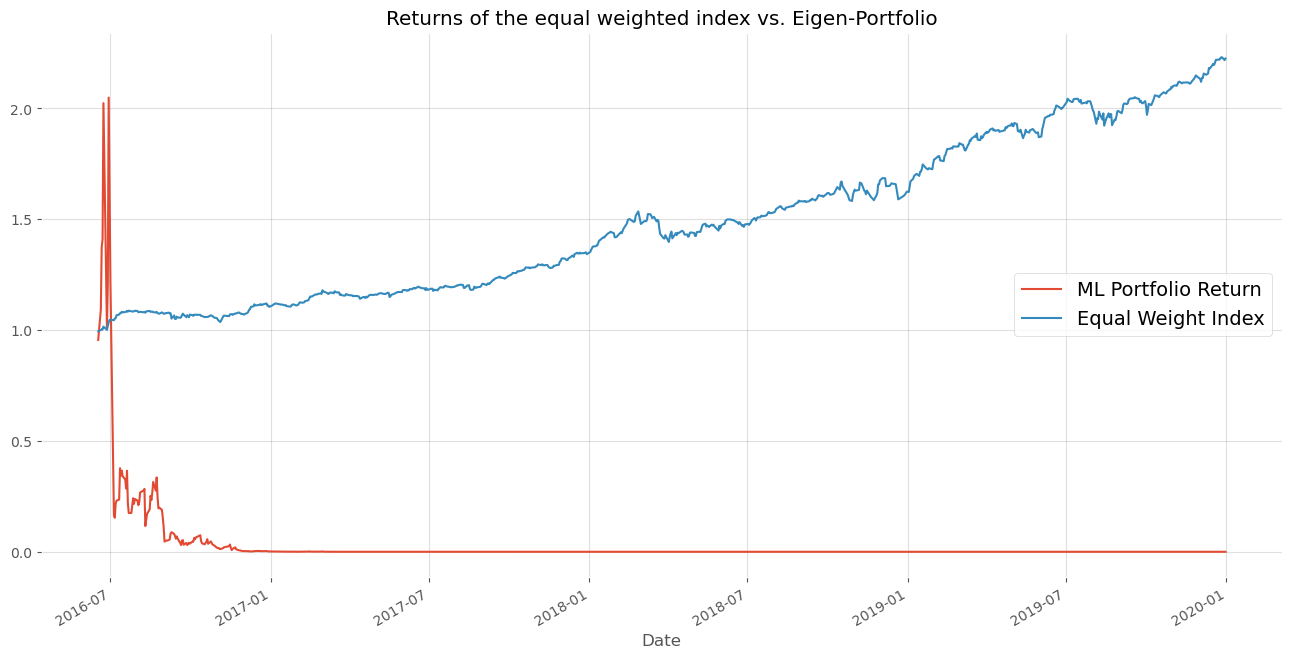

Our PCA-based Portfolio:
Return = -49.77%
Volatility = 233.53%
Sharpe = -0.21


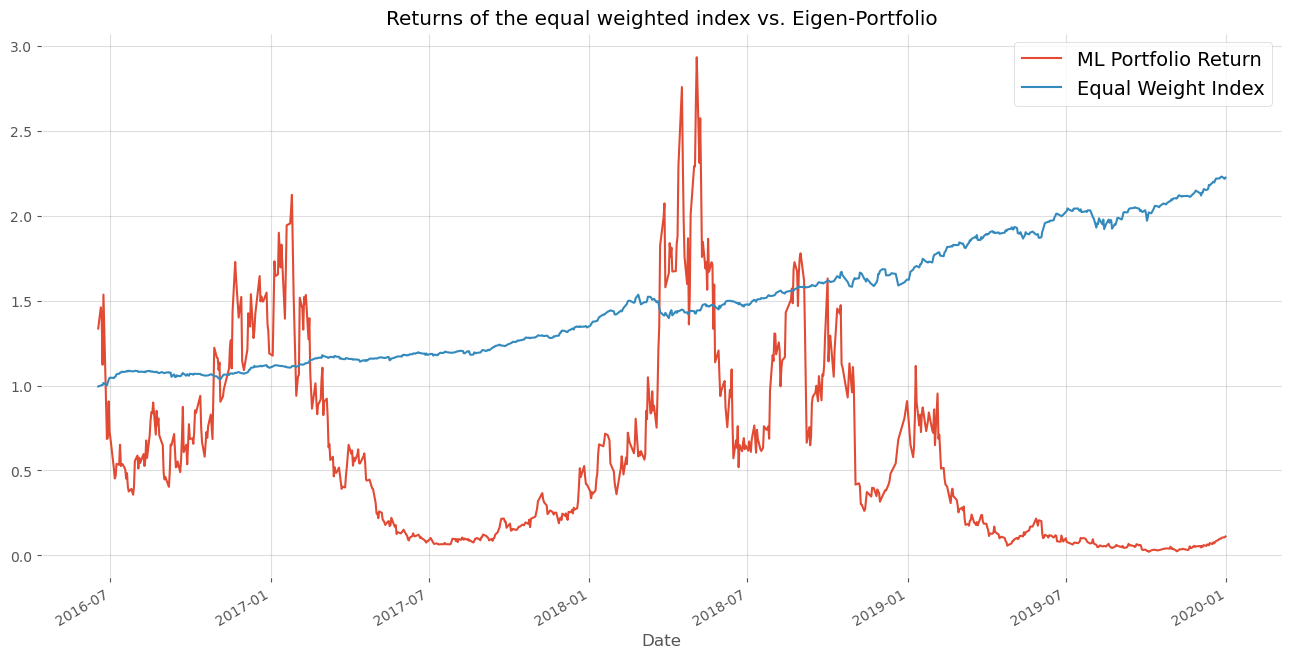

Our PCA-based Portfolio:
Return = 15.28%
Volatility = 110.10%
Sharpe = 0.14


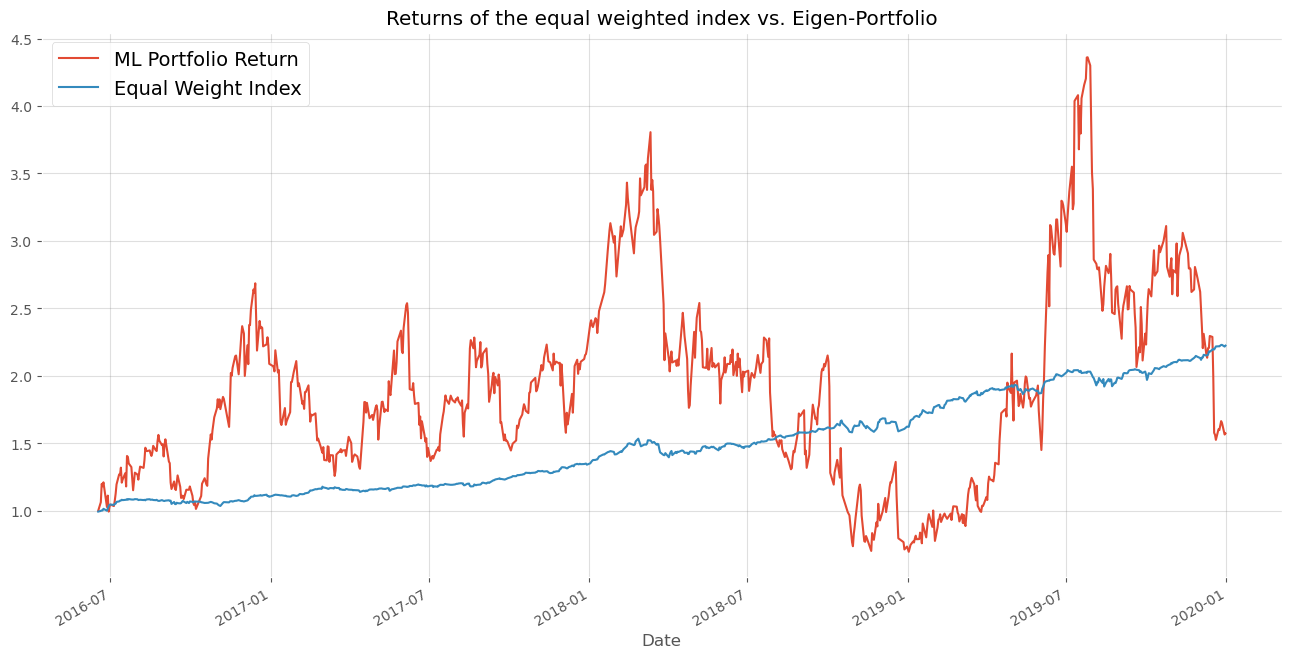

Our PCA-based Portfolio:
Return = 224.47%
Volatility = 122.70%
Sharpe = 1.83


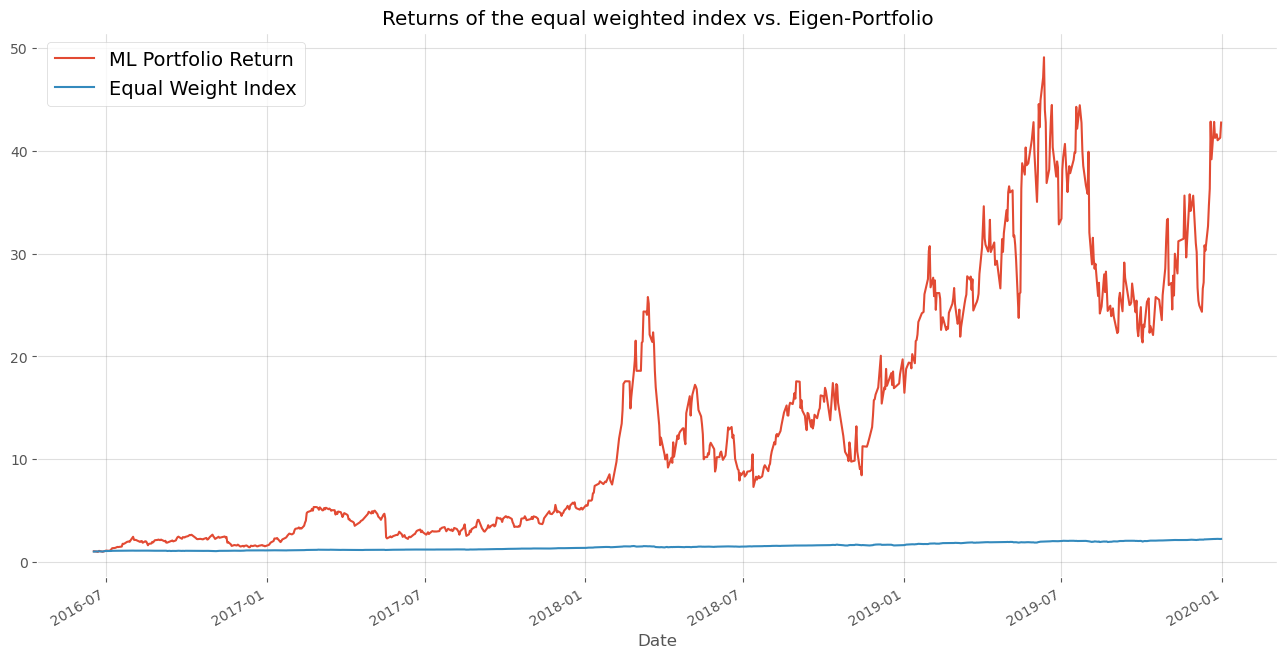

Our PCA-based Portfolio:
Return = nan%
Volatility = 584.81%
Sharpe = nan


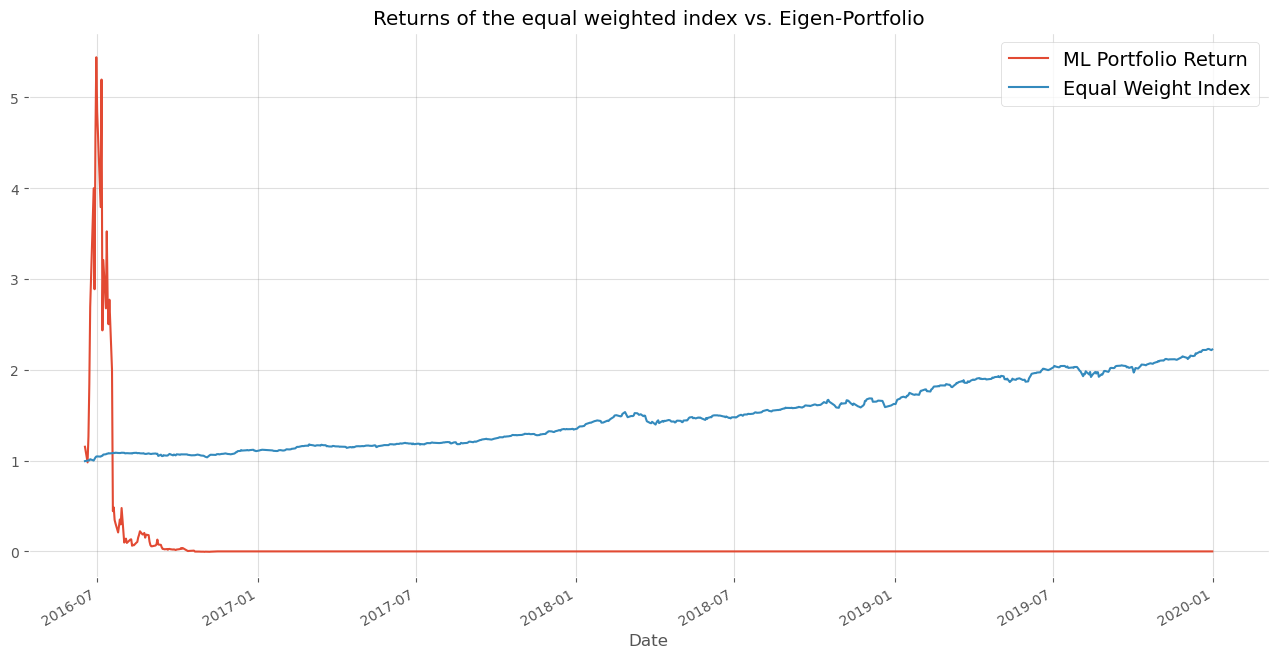

In [273]:
for i in range(len(weights)):
    backtest_PCA_porfolios(eigen = weights[i]) 

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊